In [1]:
%matplotlib inline
"""
description:
解决冻结，提取部分层
"""

'\ndescription:\n解决冻结，提取部分层\n'

In [2]:
from keras import models
from keras import layers
import keras

model = models.Sequential()
conv_base = keras.applications.VGG19(
    weights=None,
    include_top=False,#是否包含全连接层
    input_shape=(150, 150, 3)
)
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_path = 'image_dataset/train'
validate_path='image_dataset/validate'
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    validate_path,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from keras import losses,activations,optimizers
model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(0.00002),
    metrics=['acc']
)

In [6]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20
)

Instructions for updating:
Use tf.cast instead.


Epoch 1/30


 1/20 [>.............................] - ETA: 2:00 - loss: 0.6933 - acc: 0.2000

 2/20 [==>...........................] - ETA: 58s - loss: 0.6935 - acc: 0.2750 

 3/20 [===>..........................] - ETA: 37s - loss: 0.6934 - acc: 0.3500

 4/20 [=====>........................] - ETA: 27s - loss: 0.6934 - acc: 0.3875

 5/20 [======>.......................] - ETA: 20s - loss: 0.6933 - acc: 0.4400

 6/20 [========>.....................] - ETA: 16s - loss: 0.6934 - acc: 0.4167

 7/20 [=========>....................] - ETA: 13s - loss: 0.6933 - acc: 0.4214

 8/20 [===========>..................] - ETA: 11s - loss: 0.6933 - acc: 0.4125

 9/20 [============>.................] - ETA: 9s - loss: 0.6933 - acc: 0.4222 

10/20 [==============>...............] - ETA: 7s - loss: 0.6933 - acc: 0.4250

11/20 [===============>..............] - ETA: 6s - loss: 0.6933 - acc: 0.4273

12/20 [=================>............] - ETA: 5s - loss: 0.6933 - acc: 0.4292

13/20 [==================>...........] - ETA: 4s - loss: 0.6932 - acc: 0.4462

14/20 [====================>.........] - ETA: 3s - loss: 0.6932 - acc: 0.4536

15/20 [=====================>........] - ETA: 2s - loss: 0.6932 - acc: 0.4600

16/20 [=======================>......] - ETA: 2s - loss: 0.6932 - acc: 0.4625

17/20 [========================>.....] - ETA: 1s - loss: 0.6932 - acc: 0.4765

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4778

19/20 [===========================>..] - ETA: 0s - loss: 0.6931 - acc: 0.4842

20/20 [==============================] - 10s 515ms/step - loss: 0.6932 - acc: 0.4800 - val_loss: 0.6930 - val_acc: 0.5250


Epoch 2/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6933 - acc: 0.4750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6931 - acc: 0.5125

 5/20 [======>.......................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 6/20 [========>.....................] - ETA: 2s - loss: 0.6933 - acc: 0.4667

 7/20 [=========>....................] - ETA: 1s - loss: 0.6933 - acc: 0.4786

 8/20 [===========>..................] - ETA: 1s - loss: 0.6932 - acc: 0.4875

 9/20 [============>.................] - ETA: 1s - loss: 0.6932 - acc: 0.4889

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.4950

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.4909

12/20 [=================>............] - ETA: 1s - loss: 0.6933 - acc: 0.4792

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4769

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4857

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4933

16/20 [=======================>......] - ETA: 0s - loss: 0.6932 - acc: 0.4844

17/20 [========================>.....] - ETA: 0s - loss: 0.6932 - acc: 0.4735

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4667

19/20 [===========================>..] - ETA: 0s - loss: 0.6932 - acc: 0.4737

20/20 [==============================] - 4s 203ms/step - loss: 0.6932 - acc: 0.4700 - val_loss: 0.6932 - val_acc: 0.4700


Epoch 3/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6931 - acc: 0.5000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6931 - acc: 0.5750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6931 - acc: 0.5500

 4/20 [=====>........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6932 - acc: 0.5200

 6/20 [========>.....................] - ETA: 2s - loss: 0.6931 - acc: 0.5333

 7/20 [=========>....................] - ETA: 1s - loss: 0.6932 - acc: 0.5214

 8/20 [===========>..................] - ETA: 1s - loss: 0.6932 - acc: 0.5188

 9/20 [============>.................] - ETA: 1s - loss: 0.6932 - acc: 0.5000

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.4800

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.4818

12/20 [=================>............] - ETA: 1s - loss: 0.6932 - acc: 0.4792

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4885

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4893

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4800

16/20 [=======================>......] - ETA: 0s - loss: 0.6932 - acc: 0.4938

17/20 [========================>.....] - ETA: 0s - loss: 0.6932 - acc: 0.4971

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4944

19/20 [===========================>..] - ETA: 0s - loss: 0.6932 - acc: 0.5026

20/20 [==============================] - 4s 200ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4750


Epoch 4/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6934 - acc: 0.2500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6932 - acc: 0.5250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6932 - acc: 0.5167

 4/20 [=====>........................] - ETA: 2s - loss: 0.6934 - acc: 0.4500

 5/20 [======>.......................] - ETA: 2s - loss: 0.6933 - acc: 0.4300

 6/20 [========>.....................] - ETA: 2s - loss: 0.6933 - acc: 0.4417

 7/20 [=========>....................] - ETA: 1s - loss: 0.6933 - acc: 0.4357

 8/20 [===========>..................] - ETA: 1s - loss: 0.6933 - acc: 0.4438

 9/20 [============>.................] - ETA: 1s - loss: 0.6933 - acc: 0.4278

10/20 [==============>...............] - ETA: 1s - loss: 0.6933 - acc: 0.4300

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.4318

12/20 [=================>............] - ETA: 1s - loss: 0.6932 - acc: 0.4417

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4462

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4536

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4533

16/20 [=======================>......] - ETA: 0s - loss: 0.6932 - acc: 0.4531

17/20 [========================>.....] - ETA: 0s - loss: 0.6932 - acc: 0.4529

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4556

19/20 [===========================>..] - ETA: 0s - loss: 0.6932 - acc: 0.4763

20/20 [==============================] - 4s 201ms/step - loss: 0.6932 - acc: 0.4750 - val_loss: 0.6931 - val_acc: 0.5100


Epoch 5/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6931 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6933 - acc: 0.4250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6932 - acc: 0.4333

 4/20 [=====>........................] - ETA: 2s - loss: 0.6932 - acc: 0.4250

 5/20 [======>.......................] - ETA: 2s - loss: 0.6932 - acc: 0.4200

 6/20 [========>.....................] - ETA: 2s - loss: 0.6932 - acc: 0.4250

 7/20 [=========>....................] - ETA: 1s - loss: 0.6932 - acc: 0.4500

 8/20 [===========>..................] - ETA: 1s - loss: 0.6932 - acc: 0.4563

 9/20 [============>.................] - ETA: 1s - loss: 0.6932 - acc: 0.4667

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.4550

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.4636

12/20 [=================>............] - ETA: 1s - loss: 0.6932 - acc: 0.4542

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4731

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4821

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4833

16/20 [=======================>......] - ETA: 0s - loss: 0.6932 - acc: 0.4813

17/20 [========================>.....] - ETA: 0s - loss: 0.6932 - acc: 0.4853

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4889

19/20 [===========================>..] - ETA: 0s - loss: 0.6932 - acc: 0.4842

20/20 [==============================] - 4s 200ms/step - loss: 0.6932 - acc: 0.4775 - val_loss: 0.6931 - val_acc: 0.4900


Epoch 6/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6931 - acc: 0.4000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6931 - acc: 0.4750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6931 - acc: 0.4833

 4/20 [=====>........................] - ETA: 2s - loss: 0.6931 - acc: 0.4875

 5/20 [======>.......................] - ETA: 2s - loss: 0.6931 - acc: 0.4700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6932 - acc: 0.4667

 7/20 [=========>....................] - ETA: 1s - loss: 0.6932 - acc: 0.4714

 8/20 [===========>..................] - ETA: 1s - loss: 0.6931 - acc: 0.4875

 9/20 [============>.................] - ETA: 1s - loss: 0.6932 - acc: 0.4833

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.4950

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.4818

12/20 [=================>............] - ETA: 1s - loss: 0.6932 - acc: 0.4875

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4923

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4929

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4933

16/20 [=======================>......] - ETA: 0s - loss: 0.6931 - acc: 0.5125

17/20 [========================>.....] - ETA: 0s - loss: 0.6931 - acc: 0.5176

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.5083

19/20 [===========================>..] - ETA: 0s - loss: 0.6931 - acc: 0.5132

20/20 [==============================] - 4s 201ms/step - loss: 0.6931 - acc: 0.5125 - val_loss: 0.6931 - val_acc: 0.5025


Epoch 7/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6934 - acc: 0.4000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6931 - acc: 0.5167

 4/20 [=====>........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6931 - acc: 0.5100

 6/20 [========>.....................] - ETA: 2s - loss: 0.6931 - acc: 0.5083

 7/20 [=========>....................] - ETA: 1s - loss: 0.6932 - acc: 0.5000

 8/20 [===========>..................] - ETA: 1s - loss: 0.6931 - acc: 0.5063

 9/20 [============>.................] - ETA: 1s - loss: 0.6931 - acc: 0.5056

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.5000

11/20 [===============>..............] - ETA: 1s - loss: 0.6932 - acc: 0.5000

12/20 [=================>............] - ETA: 1s - loss: 0.6932 - acc: 0.4917

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.4885

14/20 [====================>.........] - ETA: 0s - loss: 0.6932 - acc: 0.4893

15/20 [=====================>........] - ETA: 0s - loss: 0.6932 - acc: 0.4933

16/20 [=======================>......] - ETA: 0s - loss: 0.6931 - acc: 0.4969

17/20 [========================>.....] - ETA: 0s - loss: 0.6931 - acc: 0.4971

18/20 [==========================>...] - ETA: 0s - loss: 0.6931 - acc: 0.5056

19/20 [===========================>..] - ETA: 0s - loss: 0.6931 - acc: 0.5026

20/20 [==============================] - 4s 200ms/step - loss: 0.6931 - acc: 0.5075 - val_loss: 0.6931 - val_acc: 0.5025


Epoch 8/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6935 - acc: 0.4000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6932 - acc: 0.5000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6932 - acc: 0.4875

 5/20 [======>.......................] - ETA: 2s - loss: 0.6931 - acc: 0.5400

 6/20 [========>.....................] - ETA: 2s - loss: 0.6931 - acc: 0.5167

 7/20 [=========>....................] - ETA: 1s - loss: 0.6931 - acc: 0.5286

 8/20 [===========>..................] - ETA: 1s - loss: 0.6931 - acc: 0.5250

 9/20 [============>.................] - ETA: 1s - loss: 0.6931 - acc: 0.5278

10/20 [==============>...............] - ETA: 1s - loss: 0.6931 - acc: 0.5200

11/20 [===============>..............] - ETA: 1s - loss: 0.6931 - acc: 0.5182

12/20 [=================>............] - ETA: 1s - loss: 0.6931 - acc: 0.5208

13/20 [==================>...........] - ETA: 1s - loss: 0.6931 - acc: 0.5192

14/20 [====================>.........] - ETA: 0s - loss: 0.6931 - acc: 0.5250

15/20 [=====================>........] - ETA: 0s - loss: 0.6931 - acc: 0.5267

16/20 [=======================>......] - ETA: 0s - loss: 0.6931 - acc: 0.5219

17/20 [========================>.....] - ETA: 0s - loss: 0.6931 - acc: 0.5147

18/20 [==========================>...] - ETA: 0s - loss: 0.6931 - acc: 0.5167

19/20 [===========================>..] - ETA: 0s - loss: 0.6931 - acc: 0.5105

20/20 [==============================] - 4s 201ms/step - loss: 0.6931 - acc: 0.5150 - val_loss: 0.6931 - val_acc: 0.4825


Epoch 9/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6936 - acc: 0.3000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6936 - acc: 0.3500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6934 - acc: 0.4667

 4/20 [=====>........................] - ETA: 2s - loss: 0.6933 - acc: 0.5000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6934 - acc: 0.4600

 6/20 [========>.....................] - ETA: 2s - loss: 0.6933 - acc: 0.4750

 7/20 [=========>....................] - ETA: 1s - loss: 0.6932 - acc: 0.5000

 8/20 [===========>..................] - ETA: 1s - loss: 0.6933 - acc: 0.4813

 9/20 [============>.................] - ETA: 1s - loss: 0.6933 - acc: 0.4722

10/20 [==============>...............] - ETA: 1s - loss: 0.6933 - acc: 0.4850

11/20 [===============>..............] - ETA: 1s - loss: 0.6933 - acc: 0.4955

12/20 [=================>............] - ETA: 1s - loss: 0.6933 - acc: 0.4917

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.5038

14/20 [====================>.........] - ETA: 0s - loss: 0.6933 - acc: 0.4929

15/20 [=====================>........] - ETA: 0s - loss: 0.6933 - acc: 0.4900

16/20 [=======================>......] - ETA: 0s - loss: 0.6932 - acc: 0.4969

17/20 [========================>.....] - ETA: 0s - loss: 0.6932 - acc: 0.4941

18/20 [==========================>...] - ETA: 0s - loss: 0.6932 - acc: 0.4944

19/20 [===========================>..] - ETA: 0s - loss: 0.6932 - acc: 0.4947

20/20 [==============================] - 4s 202ms/step - loss: 0.6932 - acc: 0.5025 - val_loss: 0.6930 - val_acc: 0.5225


Epoch 10/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6936 - acc: 0.3500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6934 - acc: 0.4500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6930 - acc: 0.5167

 4/20 [=====>........................] - ETA: 2s - loss: 0.6922 - acc: 0.5625

 5/20 [======>.......................] - ETA: 2s - loss: 0.6915 - acc: 0.5700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6893 - acc: 0.5750

 7/20 [=========>....................] - ETA: 1s - loss: 0.6885 - acc: 0.5714

 8/20 [===========>..................] - ETA: 1s - loss: 0.6900 - acc: 0.5625

 9/20 [============>.................] - ETA: 1s - loss: 0.6903 - acc: 0.5556

10/20 [==============>...............] - ETA: 1s - loss: 0.6891 - acc: 0.5650

11/20 [===============>..............] - ETA: 1s - loss: 0.6878 - acc: 0.5682

12/20 [=================>............] - ETA: 1s - loss: 0.6854 - acc: 0.5750

13/20 [==================>...........] - ETA: 1s - loss: 0.6955 - acc: 0.5615

14/20 [====================>.........] - ETA: 0s - loss: 0.6970 - acc: 0.5500

15/20 [=====================>........] - ETA: 0s - loss: 0.6962 - acc: 0.5500

16/20 [=======================>......] - ETA: 0s - loss: 0.6956 - acc: 0.5500

17/20 [========================>.....] - ETA: 0s - loss: 0.6937 - acc: 0.5588

18/20 [==========================>...] - ETA: 0s - loss: 0.6942 - acc: 0.5528

19/20 [===========================>..] - ETA: 0s - loss: 0.6956 - acc: 0.5421

20/20 [==============================] - 4s 201ms/step - loss: 0.6957 - acc: 0.5375 - val_loss: 0.6923 - val_acc: 0.5075


Epoch 11/30
 1/20 [>.............................] - ETA: 2s - loss: 0.7053 - acc: 0.4000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6966 - acc: 0.4750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6940 - acc: 0.5000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6983 - acc: 0.4625

 5/20 [======>.......................] - ETA: 2s - loss: 0.7000 - acc: 0.4300

 6/20 [========>.....................] - ETA: 2s - loss: 0.6985 - acc: 0.4417

 7/20 [=========>....................] - ETA: 1s - loss: 0.6984 - acc: 0.4357

 8/20 [===========>..................] - ETA: 1s - loss: 0.6967 - acc: 0.4688

 9/20 [============>.................] - ETA: 1s - loss: 0.6964 - acc: 0.4667

10/20 [==============>...............] - ETA: 1s - loss: 0.6957 - acc: 0.4750

11/20 [===============>..............] - ETA: 1s - loss: 0.6948 - acc: 0.4864

12/20 [=================>............] - ETA: 1s - loss: 0.6949 - acc: 0.4875

13/20 [==================>...........] - ETA: 1s - loss: 0.6936 - acc: 0.5038

14/20 [====================>.........] - ETA: 0s - loss: 0.6942 - acc: 0.4964

15/20 [=====================>........] - ETA: 0s - loss: 0.6941 - acc: 0.4967

16/20 [=======================>......] - ETA: 0s - loss: 0.6944 - acc: 0.4906

17/20 [========================>.....] - ETA: 0s - loss: 0.6938 - acc: 0.4971

18/20 [==========================>...] - ETA: 0s - loss: 0.6944 - acc: 0.4889

19/20 [===========================>..] - ETA: 0s - loss: 0.6941 - acc: 0.4947

20/20 [==============================] - 4s 201ms/step - loss: 0.6943 - acc: 0.4900 - val_loss: 0.6928 - val_acc: 0.4800


Epoch 12/30
 1/20 [>.............................] - ETA: 2s - loss: 0.7014 - acc: 0.3500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6961 - acc: 0.5000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6934 - acc: 0.5333

 4/20 [=====>........................] - ETA: 2s - loss: 0.6911 - acc: 0.5625

 5/20 [======>.......................] - ETA: 2s - loss: 0.6905 - acc: 0.5600

 6/20 [========>.....................] - ETA: 2s - loss: 0.6938 - acc: 0.5167

 7/20 [=========>....................] - ETA: 1s - loss: 0.6922 - acc: 0.5571

 8/20 [===========>..................] - ETA: 1s - loss: 0.6927 - acc: 0.5437

 9/20 [============>.................] - ETA: 1s - loss: 0.6926 - acc: 0.5389

10/20 [==============>...............] - ETA: 1s - loss: 0.6928 - acc: 0.5300

11/20 [===============>..............] - ETA: 1s - loss: 0.6925 - acc: 0.5318

12/20 [=================>............] - ETA: 1s - loss: 0.6914 - acc: 0.5542

13/20 [==================>...........] - ETA: 1s - loss: 0.6932 - acc: 0.5385

14/20 [====================>.........] - ETA: 0s - loss: 0.6930 - acc: 0.5393

15/20 [=====================>........] - ETA: 0s - loss: 0.6934 - acc: 0.5267

16/20 [=======================>......] - ETA: 0s - loss: 0.6931 - acc: 0.5313

17/20 [========================>.....] - ETA: 0s - loss: 0.6940 - acc: 0.5118

18/20 [==========================>...] - ETA: 0s - loss: 0.6938 - acc: 0.5139

19/20 [===========================>..] - ETA: 0s - loss: 0.6939 - acc: 0.5079

20/20 [==============================] - 4s 201ms/step - loss: 0.6938 - acc: 0.5100 - val_loss: 0.6913 - val_acc: 0.5300


Epoch 13/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6914 - acc: 0.4500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6919 - acc: 0.4750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6922 - acc: 0.4833

 4/20 [=====>........................] - ETA: 2s - loss: 0.6921 - acc: 0.4875

 5/20 [======>.......................] - ETA: 2s - loss: 0.6925 - acc: 0.4700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6923 - acc: 0.4917

 7/20 [=========>....................] - ETA: 1s - loss: 0.6926 - acc: 0.4857

 8/20 [===========>..................] - ETA: 1s - loss: 0.6917 - acc: 0.5188

 9/20 [============>.................] - ETA: 1s - loss: 0.6922 - acc: 0.5056

10/20 [==============>...............] - ETA: 1s - loss: 0.6921 - acc: 0.5100

11/20 [===============>..............] - ETA: 1s - loss: 0.6919 - acc: 0.5136

12/20 [=================>............] - ETA: 1s - loss: 0.6919 - acc: 0.5125

13/20 [==================>...........] - ETA: 1s - loss: 0.6919 - acc: 0.5077

14/20 [====================>.........] - ETA: 0s - loss: 0.6920 - acc: 0.5071

15/20 [=====================>........] - ETA: 0s - loss: 0.6917 - acc: 0.5100

16/20 [=======================>......] - ETA: 0s - loss: 0.6921 - acc: 0.5063

17/20 [========================>.....] - ETA: 0s - loss: 0.6924 - acc: 0.5029

18/20 [==========================>...] - ETA: 0s - loss: 0.6923 - acc: 0.5056

19/20 [===========================>..] - ETA: 0s - loss: 0.6922 - acc: 0.5079

20/20 [==============================] - 4s 202ms/step - loss: 0.6921 - acc: 0.5075 - val_loss: 0.6906 - val_acc: 0.4875


Epoch 14/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6945 - acc: 0.4500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6941 - acc: 0.4500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6943 - acc: 0.4167

 4/20 [=====>........................] - ETA: 2s - loss: 0.6939 - acc: 0.4625

 5/20 [======>.......................] - ETA: 2s - loss: 0.6938 - acc: 0.4600

 6/20 [========>.....................] - ETA: 2s - loss: 0.6936 - acc: 0.4833

 7/20 [=========>....................] - ETA: 1s - loss: 0.6934 - acc: 0.5143

 8/20 [===========>..................] - ETA: 1s - loss: 0.6934 - acc: 0.5000

 9/20 [============>.................] - ETA: 1s - loss: 0.6933 - acc: 0.5167

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.5250

11/20 [===============>..............] - ETA: 1s - loss: 0.6928 - acc: 0.5500

12/20 [=================>............] - ETA: 1s - loss: 0.6924 - acc: 0.5500

13/20 [==================>...........] - ETA: 1s - loss: 0.6930 - acc: 0.5346

14/20 [====================>.........] - ETA: 0s - loss: 0.6928 - acc: 0.5393

15/20 [=====================>........] - ETA: 0s - loss: 0.6921 - acc: 0.5433

16/20 [=======================>......] - ETA: 0s - loss: 0.6917 - acc: 0.5406

17/20 [========================>.....] - ETA: 0s - loss: 0.6919 - acc: 0.5382

18/20 [==========================>...] - ETA: 0s - loss: 0.6909 - acc: 0.5500

19/20 [===========================>..] - ETA: 0s - loss: 0.6887 - acc: 0.5553

20/20 [==============================] - 4s 201ms/step - loss: 0.6950 - acc: 0.5475 - val_loss: 0.6848 - val_acc: 0.5025


Epoch 15/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6780 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6858 - acc: 0.5250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6882 - acc: 0.5167

 4/20 [=====>........................] - ETA: 2s - loss: 0.7001 - acc: 0.4375

 5/20 [======>.......................] - ETA: 2s - loss: 0.6984 - acc: 0.4700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6962 - acc: 0.5000

 7/20 [=========>....................] - ETA: 1s - loss: 0.6938 - acc: 0.5000

 8/20 [===========>..................] - ETA: 1s - loss: 0.6940 - acc: 0.4938

 9/20 [============>.................] - ETA: 1s - loss: 0.6929 - acc: 0.5111

10/20 [==============>...............] - ETA: 1s - loss: 0.6932 - acc: 0.5050

11/20 [===============>..............] - ETA: 1s - loss: 0.6923 - acc: 0.5045

12/20 [=================>............] - ETA: 1s - loss: 0.6923 - acc: 0.5042

13/20 [==================>...........] - ETA: 1s - loss: 0.6909 - acc: 0.5308

14/20 [====================>.........] - ETA: 0s - loss: 0.6913 - acc: 0.5286

15/20 [=====================>........] - ETA: 0s - loss: 0.6911 - acc: 0.5233

16/20 [=======================>......] - ETA: 0s - loss: 0.6900 - acc: 0.5375

17/20 [========================>.....] - ETA: 0s - loss: 0.6901 - acc: 0.5324

18/20 [==========================>...] - ETA: 0s - loss: 0.6899 - acc: 0.5389

19/20 [===========================>..] - ETA: 0s - loss: 0.6892 - acc: 0.5447

20/20 [==============================] - 4s 202ms/step - loss: 0.6870 - acc: 0.5475 - val_loss: 0.7091 - val_acc: 0.5000


Epoch 16/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6040 - acc: 0.7000

 2/20 [==>...........................] - ETA: 2s - loss: 0.8199 - acc: 0.5250

 3/20 [===>..........................] - ETA: 2s - loss: 0.7813 - acc: 0.4833

 4/20 [=====>........................] - ETA: 2s - loss: 0.7541 - acc: 0.5250

 5/20 [======>.......................] - ETA: 2s - loss: 0.7455 - acc: 0.4900

 6/20 [========>.....................] - ETA: 2s - loss: 0.7357 - acc: 0.4917

 7/20 [=========>....................] - ETA: 1s - loss: 0.7253 - acc: 0.5357

 8/20 [===========>..................] - ETA: 1s - loss: 0.7210 - acc: 0.5375

 9/20 [============>.................] - ETA: 1s - loss: 0.7171 - acc: 0.5389

10/20 [==============>...............] - ETA: 1s - loss: 0.7127 - acc: 0.5400

11/20 [===============>..............] - ETA: 1s - loss: 0.7086 - acc: 0.5500

12/20 [=================>............] - ETA: 1s - loss: 0.7053 - acc: 0.5583

13/20 [==================>...........] - ETA: 1s - loss: 0.7032 - acc: 0.5538

14/20 [====================>.........] - ETA: 0s - loss: 0.7014 - acc: 0.5571

15/20 [=====================>........] - ETA: 0s - loss: 0.7010 - acc: 0.5533

16/20 [=======================>......] - ETA: 0s - loss: 0.7011 - acc: 0.5531

17/20 [========================>.....] - ETA: 0s - loss: 0.6994 - acc: 0.5559

18/20 [==========================>...] - ETA: 0s - loss: 0.6979 - acc: 0.5611

19/20 [===========================>..] - ETA: 0s - loss: 0.6987 - acc: 0.5553

20/20 [==============================] - 4s 201ms/step - loss: 0.6980 - acc: 0.5550 - val_loss: 0.6783 - val_acc: 0.5725


Epoch 17/30
 1/20 [>.............................] - ETA: 2s - loss: 0.7323 - acc: 0.3500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6964 - acc: 0.5000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6903 - acc: 0.5333

 4/20 [=====>........................] - ETA: 2s - loss: 0.6800 - acc: 0.5750

 5/20 [======>.......................] - ETA: 2s - loss: 0.6797 - acc: 0.5700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6788 - acc: 0.5500

 7/20 [=========>....................] - ETA: 1s - loss: 0.6792 - acc: 0.5643

 8/20 [===========>..................] - ETA: 1s - loss: 0.6893 - acc: 0.5375

 9/20 [============>.................] - ETA: 1s - loss: 0.6902 - acc: 0.5333

10/20 [==============>...............] - ETA: 1s - loss: 0.6916 - acc: 0.5250

11/20 [===============>..............] - ETA: 1s - loss: 0.6894 - acc: 0.5318

12/20 [=================>............] - ETA: 1s - loss: 0.6877 - acc: 0.5417

13/20 [==================>...........] - ETA: 1s - loss: 0.6866 - acc: 0.5423

14/20 [====================>.........] - ETA: 0s - loss: 0.6896 - acc: 0.5321

15/20 [=====================>........] - ETA: 0s - loss: 0.6884 - acc: 0.5433

16/20 [=======================>......] - ETA: 0s - loss: 0.6902 - acc: 0.5406

17/20 [========================>.....] - ETA: 0s - loss: 0.6885 - acc: 0.5471

18/20 [==========================>...] - ETA: 0s - loss: 0.6889 - acc: 0.5444

19/20 [===========================>..] - ETA: 0s - loss: 0.6876 - acc: 0.5500

20/20 [==============================] - 4s 201ms/step - loss: 0.6876 - acc: 0.5450 - val_loss: 0.6803 - val_acc: 0.5250


Epoch 18/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6595 - acc: 0.7000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6675 - acc: 0.6000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6574 - acc: 0.6000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6602 - acc: 0.6000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6697 - acc: 0.5900

 6/20 [========>.....................] - ETA: 2s - loss: 0.6691 - acc: 0.5917

 7/20 [=========>....................] - ETA: 1s - loss: 0.6706 - acc: 0.5786

 8/20 [===========>..................] - ETA: 1s - loss: 0.6769 - acc: 0.5688

 9/20 [============>.................] - ETA: 1s - loss: 0.6802 - acc: 0.5667

10/20 [==============>...............] - ETA: 1s - loss: 0.6744 - acc: 0.5800

11/20 [===============>..............] - ETA: 1s - loss: 0.6757 - acc: 0.5773

12/20 [=================>............] - ETA: 1s - loss: 0.6779 - acc: 0.5708

13/20 [==================>...........] - ETA: 1s - loss: 0.6767 - acc: 0.5692

14/20 [====================>.........] - ETA: 0s - loss: 0.6761 - acc: 0.5679

15/20 [=====================>........] - ETA: 0s - loss: 0.6754 - acc: 0.5667

16/20 [=======================>......] - ETA: 0s - loss: 0.6737 - acc: 0.5750

17/20 [========================>.....] - ETA: 0s - loss: 0.6725 - acc: 0.5794

18/20 [==========================>...] - ETA: 0s - loss: 0.6737 - acc: 0.5861

19/20 [===========================>..] - ETA: 0s - loss: 0.6734 - acc: 0.5868

20/20 [==============================] - 4s 205ms/step - loss: 0.6737 - acc: 0.5850 - val_loss: 0.6560 - val_acc: 0.6200


Epoch 19/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6269 - acc: 0.7500

 2/20 [==>...........................] - ETA: 2s - loss: 0.7053 - acc: 0.5250

 3/20 [===>..........................] - ETA: 2s - loss: 0.7238 - acc: 0.4833

 4/20 [=====>........................] - ETA: 2s - loss: 0.7148 - acc: 0.5000

 5/20 [======>.......................] - ETA: 2s - loss: 0.7103 - acc: 0.5000

 6/20 [========>.....................] - ETA: 2s - loss: 0.7055 - acc: 0.5167

 7/20 [=========>....................] - ETA: 1s - loss: 0.7005 - acc: 0.5214

 8/20 [===========>..................] - ETA: 1s - loss: 0.6959 - acc: 0.5438

 9/20 [============>.................] - ETA: 1s - loss: 0.6939 - acc: 0.5556

10/20 [==============>...............] - ETA: 1s - loss: 0.6916 - acc: 0.5600

11/20 [===============>..............] - ETA: 1s - loss: 0.6930 - acc: 0.5500

12/20 [=================>............] - ETA: 1s - loss: 0.6958 - acc: 0.5375

13/20 [==================>...........] - ETA: 1s - loss: 0.6970 - acc: 0.5269

14/20 [====================>.........] - ETA: 0s - loss: 0.6939 - acc: 0.5464

15/20 [=====================>........] - ETA: 0s - loss: 0.6929 - acc: 0.5500

16/20 [=======================>......] - ETA: 0s - loss: 0.6899 - acc: 0.5594

17/20 [========================>.....] - ETA: 0s - loss: 0.6907 - acc: 0.5471

18/20 [==========================>...] - ETA: 0s - loss: 0.6943 - acc: 0.5361

19/20 [===========================>..] - ETA: 0s - loss: 0.6925 - acc: 0.5447

20/20 [==============================] - 4s 202ms/step - loss: 0.6916 - acc: 0.5500 - val_loss: 0.6672 - val_acc: 0.6425


Epoch 20/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6726 - acc: 0.6500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6966 - acc: 0.5500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6875 - acc: 0.6000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6811 - acc: 0.6125

 5/20 [======>.......................] - ETA: 2s - loss: 0.6942 - acc: 0.5600

 6/20 [========>.....................] - ETA: 2s - loss: 0.6904 - acc: 0.5750

 7/20 [=========>....................] - ETA: 1s - loss: 0.6844 - acc: 0.6071

 8/20 [===========>..................] - ETA: 1s - loss: 0.6837 - acc: 0.6125

 9/20 [============>.................] - ETA: 1s - loss: 0.6792 - acc: 0.6278

10/20 [==============>...............] - ETA: 1s - loss: 0.6750 - acc: 0.6300

11/20 [===============>..............] - ETA: 1s - loss: 0.6705 - acc: 0.6409

12/20 [=================>............] - ETA: 1s - loss: 0.6729 - acc: 0.6292

13/20 [==================>...........] - ETA: 1s - loss: 0.6662 - acc: 0.6385

14/20 [====================>.........] - ETA: 0s - loss: 0.6650 - acc: 0.6393

15/20 [=====================>........] - ETA: 0s - loss: 0.6727 - acc: 0.6267

16/20 [=======================>......] - ETA: 0s - loss: 0.6729 - acc: 0.6219

17/20 [========================>.....] - ETA: 0s - loss: 0.6709 - acc: 0.6206

18/20 [==========================>...] - ETA: 0s - loss: 0.6727 - acc: 0.6139

19/20 [===========================>..] - ETA: 0s - loss: 0.6687 - acc: 0.6237

20/20 [==============================] - 4s 202ms/step - loss: 0.6728 - acc: 0.6075 - val_loss: 0.6828 - val_acc: 0.5375


Epoch 21/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6952 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6547 - acc: 0.6250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6632 - acc: 0.6000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6743 - acc: 0.5625

 5/20 [======>.......................] - ETA: 2s - loss: 0.6696 - acc: 0.5700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6627 - acc: 0.5833

 7/20 [=========>....................] - ETA: 1s - loss: 0.6572 - acc: 0.5929

 8/20 [===========>..................] - ETA: 1s - loss: 0.6564 - acc: 0.5938

 9/20 [============>.................] - ETA: 1s - loss: 0.6515 - acc: 0.6111

10/20 [==============>...............] - ETA: 1s - loss: 0.6554 - acc: 0.6100

11/20 [===============>..............] - ETA: 1s - loss: 0.6536 - acc: 0.6045

12/20 [=================>............] - ETA: 1s - loss: 0.6637 - acc: 0.5958

13/20 [==================>...........] - ETA: 1s - loss: 0.6589 - acc: 0.6000

14/20 [====================>.........] - ETA: 0s - loss: 0.6608 - acc: 0.5964

15/20 [=====================>........] - ETA: 0s - loss: 0.6670 - acc: 0.5900

16/20 [=======================>......] - ETA: 0s - loss: 0.6652 - acc: 0.5969

17/20 [========================>.....] - ETA: 0s - loss: 0.6647 - acc: 0.5941

18/20 [==========================>...] - ETA: 0s - loss: 0.6687 - acc: 0.5889

19/20 [===========================>..] - ETA: 0s - loss: 0.6686 - acc: 0.5921

20/20 [==============================] - 4s 203ms/step - loss: 0.6669 - acc: 0.5975 - val_loss: 0.6504 - val_acc: 0.6375


Epoch 22/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6845 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6487 - acc: 0.6000

 3/20 [===>..........................] - ETA: 2s - loss: 0.6643 - acc: 0.5500

 4/20 [=====>........................] - ETA: 2s - loss: 0.6776 - acc: 0.5500

 5/20 [======>.......................] - ETA: 2s - loss: 0.6677 - acc: 0.5600

 6/20 [========>.....................] - ETA: 2s - loss: 0.6714 - acc: 0.5500

 7/20 [=========>....................] - ETA: 1s - loss: 0.6765 - acc: 0.5429

 8/20 [===========>..................] - ETA: 1s - loss: 0.6734 - acc: 0.5375

 9/20 [============>.................] - ETA: 1s - loss: 0.6665 - acc: 0.5611

10/20 [==============>...............] - ETA: 1s - loss: 0.6615 - acc: 0.5750

11/20 [===============>..............] - ETA: 1s - loss: 0.6551 - acc: 0.6000

12/20 [=================>............] - ETA: 1s - loss: 0.6489 - acc: 0.6125

13/20 [==================>...........] - ETA: 1s - loss: 0.6512 - acc: 0.6115

14/20 [====================>.........] - ETA: 0s - loss: 0.6517 - acc: 0.6143

15/20 [=====================>........] - ETA: 0s - loss: 0.6461 - acc: 0.6200

16/20 [=======================>......] - ETA: 0s - loss: 0.6462 - acc: 0.6188

17/20 [========================>.....] - ETA: 0s - loss: 0.6454 - acc: 0.6147

18/20 [==========================>...] - ETA: 0s - loss: 0.6512 - acc: 0.6083

19/20 [===========================>..] - ETA: 0s - loss: 0.6547 - acc: 0.6053

20/20 [==============================] - 4s 203ms/step - loss: 0.6552 - acc: 0.6000 - val_loss: 0.6932 - val_acc: 0.5600


Epoch 23/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6425 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6112 - acc: 0.6750

 3/20 [===>..........................] - ETA: 2s - loss: 0.6432 - acc: 0.6333

 4/20 [=====>........................] - ETA: 2s - loss: 0.6500 - acc: 0.6375

 5/20 [======>.......................] - ETA: 2s - loss: 0.6893 - acc: 0.5900

 6/20 [========>.....................] - ETA: 2s - loss: 0.6957 - acc: 0.5750

 7/20 [=========>....................] - ETA: 1s - loss: 0.6922 - acc: 0.5786

 8/20 [===========>..................] - ETA: 1s - loss: 0.6894 - acc: 0.5875

 9/20 [============>.................] - ETA: 1s - loss: 0.6884 - acc: 0.5889

10/20 [==============>...............] - ETA: 1s - loss: 0.6820 - acc: 0.6100

11/20 [===============>..............] - ETA: 1s - loss: 0.6870 - acc: 0.6000

12/20 [=================>............] - ETA: 1s - loss: 0.6856 - acc: 0.5958

13/20 [==================>...........] - ETA: 1s - loss: 0.6806 - acc: 0.6038

14/20 [====================>.........] - ETA: 0s - loss: 0.6845 - acc: 0.5929

15/20 [=====================>........] - ETA: 0s - loss: 0.6866 - acc: 0.5767

16/20 [=======================>......] - ETA: 0s - loss: 0.6875 - acc: 0.5750

17/20 [========================>.....] - ETA: 0s - loss: 0.6880 - acc: 0.5706

18/20 [==========================>...] - ETA: 0s - loss: 0.6869 - acc: 0.5722

19/20 [===========================>..] - ETA: 0s - loss: 0.6889 - acc: 0.5658

20/20 [==============================] - 4s 206ms/step - loss: 0.6867 - acc: 0.5675 - val_loss: 0.6634 - val_acc: 0.6175


Epoch 24/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6783 - acc: 0.6000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6879 - acc: 0.5500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6763 - acc: 0.5833

 4/20 [=====>........................] - ETA: 2s - loss: 0.6612 - acc: 0.5875

 5/20 [======>.......................] - ETA: 2s - loss: 0.6639 - acc: 0.5900

 6/20 [========>.....................] - ETA: 2s - loss: 0.6592 - acc: 0.6083

 7/20 [=========>....................] - ETA: 1s - loss: 0.6619 - acc: 0.6000

 8/20 [===========>..................] - ETA: 1s - loss: 0.6598 - acc: 0.6188

 9/20 [============>.................] - ETA: 1s - loss: 0.6606 - acc: 0.6222

10/20 [==============>...............] - ETA: 1s - loss: 0.6590 - acc: 0.6250

11/20 [===============>..............] - ETA: 1s - loss: 0.6585 - acc: 0.6318

12/20 [=================>............] - ETA: 1s - loss: 0.6630 - acc: 0.6167

13/20 [==================>...........] - ETA: 1s - loss: 0.6642 - acc: 0.6115

14/20 [====================>.........] - ETA: 0s - loss: 0.6672 - acc: 0.6036

15/20 [=====================>........] - ETA: 0s - loss: 0.6660 - acc: 0.6100

16/20 [=======================>......] - ETA: 0s - loss: 0.6693 - acc: 0.5969

17/20 [========================>.....] - ETA: 0s - loss: 0.6710 - acc: 0.5882

18/20 [==========================>...] - ETA: 0s - loss: 0.6686 - acc: 0.5972

19/20 [===========================>..] - ETA: 0s - loss: 0.6695 - acc: 0.5947

20/20 [==============================] - 4s 203ms/step - loss: 0.6668 - acc: 0.6025 - val_loss: 0.6708 - val_acc: 0.5750


Epoch 25/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6330 - acc: 0.6500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6673 - acc: 0.6250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6638 - acc: 0.6000

 4/20 [=====>........................] - ETA: 2s - loss: 0.6561 - acc: 0.6375

 5/20 [======>.......................] - ETA: 2s - loss: 0.6620 - acc: 0.6000

 6/20 [========>.....................] - ETA: 2s - loss: 0.6508 - acc: 0.6167

 7/20 [=========>....................] - ETA: 1s - loss: 0.6429 - acc: 0.6214

 8/20 [===========>..................] - ETA: 1s - loss: 0.6326 - acc: 0.6437

 9/20 [============>.................] - ETA: 1s - loss: 0.6387 - acc: 0.6444

10/20 [==============>...............] - ETA: 1s - loss: 0.6383 - acc: 0.6350

11/20 [===============>..............] - ETA: 1s - loss: 0.6370 - acc: 0.6364

12/20 [=================>............] - ETA: 1s - loss: 0.6416 - acc: 0.6292

13/20 [==================>...........] - ETA: 1s - loss: 0.6424 - acc: 0.6231

14/20 [====================>.........] - ETA: 0s - loss: 0.6390 - acc: 0.6321

15/20 [=====================>........] - ETA: 0s - loss: 0.6475 - acc: 0.6267

16/20 [=======================>......] - ETA: 0s - loss: 0.6518 - acc: 0.6219

17/20 [========================>.....] - ETA: 0s - loss: 0.6532 - acc: 0.6176

18/20 [==========================>...] - ETA: 0s - loss: 0.6535 - acc: 0.6222

19/20 [===========================>..] - ETA: 0s - loss: 0.6520 - acc: 0.6263

20/20 [==============================] - 4s 203ms/step - loss: 0.6530 - acc: 0.6225 - val_loss: 0.6491 - val_acc: 0.6175


Epoch 26/30
 1/20 [>.............................] - ETA: 2s - loss: 0.7510 - acc: 0.5000

 2/20 [==>...........................] - ETA: 2s - loss: 0.6771 - acc: 0.6250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6409 - acc: 0.6833

 4/20 [=====>........................] - ETA: 2s - loss: 0.6401 - acc: 0.7000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6523 - acc: 0.6700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6428 - acc: 0.6917

 7/20 [=========>....................] - ETA: 1s - loss: 0.6648 - acc: 0.6500

 8/20 [===========>..................] - ETA: 1s - loss: 0.6774 - acc: 0.6125

 9/20 [============>.................] - ETA: 1s - loss: 0.6716 - acc: 0.6278

10/20 [==============>...............] - ETA: 1s - loss: 0.6582 - acc: 0.6400

11/20 [===============>..............] - ETA: 1s - loss: 0.6571 - acc: 0.6364

12/20 [=================>............] - ETA: 1s - loss: 0.6479 - acc: 0.6458

13/20 [==================>...........] - ETA: 1s - loss: 0.6480 - acc: 0.6423

14/20 [====================>.........] - ETA: 0s - loss: 0.6528 - acc: 0.6357

15/20 [=====================>........] - ETA: 0s - loss: 0.6564 - acc: 0.6300

16/20 [=======================>......] - ETA: 0s - loss: 0.6531 - acc: 0.6313

17/20 [========================>.....] - ETA: 0s - loss: 0.6553 - acc: 0.6294

18/20 [==========================>...] - ETA: 0s - loss: 0.6571 - acc: 0.6250

19/20 [===========================>..] - ETA: 0s - loss: 0.6558 - acc: 0.6263

20/20 [==============================] - 4s 203ms/step - loss: 0.6572 - acc: 0.6225 - val_loss: 0.6285 - val_acc: 0.6450


Epoch 27/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6013 - acc: 0.7500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6366 - acc: 0.6500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6304 - acc: 0.6667

 4/20 [=====>........................] - ETA: 2s - loss: 0.6232 - acc: 0.6750

 5/20 [======>.......................] - ETA: 2s - loss: 0.6270 - acc: 0.6400

 6/20 [========>.....................] - ETA: 2s - loss: 0.6385 - acc: 0.6250

 7/20 [=========>....................] - ETA: 1s - loss: 0.6433 - acc: 0.6143

 8/20 [===========>..................] - ETA: 1s - loss: 0.6421 - acc: 0.6125

 9/20 [============>.................] - ETA: 1s - loss: 0.6522 - acc: 0.6000

10/20 [==============>...............] - ETA: 1s - loss: 0.6526 - acc: 0.5950

11/20 [===============>..............] - ETA: 1s - loss: 0.6579 - acc: 0.5955

12/20 [=================>............] - ETA: 1s - loss: 0.6593 - acc: 0.6000

13/20 [==================>...........] - ETA: 1s - loss: 0.6523 - acc: 0.6115

14/20 [====================>.........] - ETA: 0s - loss: 0.6596 - acc: 0.6036

15/20 [=====================>........] - ETA: 0s - loss: 0.6522 - acc: 0.6200

16/20 [=======================>......] - ETA: 0s - loss: 0.6509 - acc: 0.6188

17/20 [========================>.....] - ETA: 0s - loss: 0.6529 - acc: 0.6118

18/20 [==========================>...] - ETA: 0s - loss: 0.6516 - acc: 0.6167

19/20 [===========================>..] - ETA: 0s - loss: 0.6479 - acc: 0.6289

20/20 [==============================] - 4s 203ms/step - loss: 0.6470 - acc: 0.6325 - val_loss: 0.6950 - val_acc: 0.5875


Epoch 28/30
 1/20 [>.............................] - ETA: 2s - loss: 0.5977 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6651 - acc: 0.5250

 3/20 [===>..........................] - ETA: 2s - loss: 0.6596 - acc: 0.5333

 4/20 [=====>........................] - ETA: 2s - loss: 0.6604 - acc: 0.5375

 5/20 [======>.......................] - ETA: 2s - loss: 0.6432 - acc: 0.5700

 6/20 [========>.....................] - ETA: 2s - loss: 0.6224 - acc: 0.6000

 7/20 [=========>....................] - ETA: 1s - loss: 0.6551 - acc: 0.5929

 8/20 [===========>..................] - ETA: 1s - loss: 0.6551 - acc: 0.5875

 9/20 [============>.................] - ETA: 1s - loss: 0.6592 - acc: 0.5833

10/20 [==============>...............] - ETA: 1s - loss: 0.6605 - acc: 0.5700

11/20 [===============>..............] - ETA: 1s - loss: 0.6617 - acc: 0.5636

12/20 [=================>............] - ETA: 1s - loss: 0.6687 - acc: 0.5500

13/20 [==================>...........] - ETA: 1s - loss: 0.6641 - acc: 0.5615

14/20 [====================>.........] - ETA: 0s - loss: 0.6564 - acc: 0.5857

15/20 [=====================>........] - ETA: 0s - loss: 0.6539 - acc: 0.5933

16/20 [=======================>......] - ETA: 0s - loss: 0.6532 - acc: 0.5938

17/20 [========================>.....] - ETA: 0s - loss: 0.6519 - acc: 0.6000

18/20 [==========================>...] - ETA: 0s - loss: 0.6467 - acc: 0.6139

19/20 [===========================>..] - ETA: 0s - loss: 0.6585 - acc: 0.6000

20/20 [==============================] - 4s 206ms/step - loss: 0.6582 - acc: 0.6025 - val_loss: 0.6413 - val_acc: 0.6475


Epoch 29/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6024 - acc: 0.6500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6082 - acc: 0.6500

 3/20 [===>..........................] - ETA: 2s - loss: 0.5773 - acc: 0.7000

 4/20 [=====>........................] - ETA: 2s - loss: 0.5974 - acc: 0.7000

 5/20 [======>.......................] - ETA: 2s - loss: 0.6303 - acc: 0.6500

 6/20 [========>.....................] - ETA: 2s - loss: 0.6274 - acc: 0.6583

 7/20 [=========>....................] - ETA: 1s - loss: 0.6340 - acc: 0.6500

 8/20 [===========>..................] - ETA: 1s - loss: 0.6337 - acc: 0.6562

 9/20 [============>.................] - ETA: 1s - loss: 0.6376 - acc: 0.6500

10/20 [==============>...............] - ETA: 1s - loss: 0.6317 - acc: 0.6600

11/20 [===============>..............] - ETA: 1s - loss: 0.6223 - acc: 0.6727

12/20 [=================>............] - ETA: 1s - loss: 0.6249 - acc: 0.6708

13/20 [==================>...........] - ETA: 1s - loss: 0.6251 - acc: 0.6654

14/20 [====================>.........] - ETA: 0s - loss: 0.6267 - acc: 0.6607

15/20 [=====================>........] - ETA: 0s - loss: 0.6322 - acc: 0.6567

16/20 [=======================>......] - ETA: 0s - loss: 0.6404 - acc: 0.6438

17/20 [========================>.....] - ETA: 0s - loss: 0.6428 - acc: 0.6412

18/20 [==========================>...] - ETA: 0s - loss: 0.6458 - acc: 0.6389

19/20 [===========================>..] - ETA: 0s - loss: 0.6466 - acc: 0.6368

20/20 [==============================] - 4s 204ms/step - loss: 0.6529 - acc: 0.6250 - val_loss: 0.6398 - val_acc: 0.6625


Epoch 30/30
 1/20 [>.............................] - ETA: 2s - loss: 0.6677 - acc: 0.5500

 2/20 [==>...........................] - ETA: 2s - loss: 0.6908 - acc: 0.5500

 3/20 [===>..........................] - ETA: 2s - loss: 0.6771 - acc: 0.5833

 4/20 [=====>........................] - ETA: 2s - loss: 0.6775 - acc: 0.5875

 5/20 [======>.......................] - ETA: 2s - loss: 0.6714 - acc: 0.6000

 6/20 [========>.....................] - ETA: 2s - loss: 0.6673 - acc: 0.5917

 7/20 [=========>....................] - ETA: 1s - loss: 0.6603 - acc: 0.6071

 8/20 [===========>..................] - ETA: 1s - loss: 0.6611 - acc: 0.6187

 9/20 [============>.................] - ETA: 1s - loss: 0.6551 - acc: 0.6333

10/20 [==============>...............] - ETA: 1s - loss: 0.6482 - acc: 0.6400

11/20 [===============>..............] - ETA: 1s - loss: 0.6592 - acc: 0.6409

12/20 [=================>............] - ETA: 1s - loss: 0.6627 - acc: 0.6292

13/20 [==================>...........] - ETA: 1s - loss: 0.6593 - acc: 0.6346

14/20 [====================>.........] - ETA: 0s - loss: 0.6596 - acc: 0.6357

15/20 [=====================>........] - ETA: 0s - loss: 0.6567 - acc: 0.6433

16/20 [=======================>......] - ETA: 0s - loss: 0.6637 - acc: 0.6281

17/20 [========================>.....] - ETA: 0s - loss: 0.6627 - acc: 0.6265

18/20 [==========================>...] - ETA: 0s - loss: 0.6590 - acc: 0.6222

19/20 [===========================>..] - ETA: 0s - loss: 0.6579 - acc: 0.6263

20/20 [==============================] - 4s 204ms/step - loss: 0.6593 - acc: 0.6200 - val_loss: 0.7183 - val_acc: 0.5225


In [7]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    print(layer.name)
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print(layer.trainable)

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_conv4
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_conv4
False
block4_pool
False
block5_conv1
True
block5_conv2
True
block5_conv3
True
block5_conv4
True
block5_pool
True


In [9]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(0.00001),
    metrics=['acc']
)
history=model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20
)

Epoch 1/30


 1/50 [..............................] - ETA: 41s - loss: 0.6263 - acc: 0.5500

 2/50 [>.............................] - ETA: 22s - loss: 0.6275 - acc: 0.6250

 3/50 [>.............................] - ETA: 15s - loss: 0.6371 - acc: 0.6333

 4/50 [=>............................] - ETA: 12s - loss: 0.6494 - acc: 0.6125



 5/50 [==>...........................] - ETA: 10s - loss: 0.6558 - acc: 0.6000

 6/50 [==>...........................] - ETA: 8s - loss: 0.6583 - acc: 0.5833 

 7/50 [===>..........................] - ETA: 7s - loss: 0.6631 - acc: 0.5571

 8/50 [===>..........................] - ETA: 7s - loss: 0.6543 - acc: 0.5750

 9/50 [====>.........................] - ETA: 6s - loss: 0.6495 - acc: 0.5778

10/50 [=====>........................] - ETA: 5s - loss: 0.6404 - acc: 0.6050

11/50 [=====>........................] - ETA: 5s - loss: 0.6439 - acc: 0.6045

12/50 [======>.......................] - ETA: 5s - loss: 0.6425 - acc: 0.6125

13/50 [======>.......................] - ETA: 4s - loss: 0.6425 - acc: 0.6077

14/50 [=======>......................] - ETA: 4s - loss: 0.6364 - acc: 0.6250

15/50 [========>.....................] - ETA: 4s - loss: 0.6399 - acc: 0.6167

16/50 [========>.....................] - ETA: 4s - loss: 0.6394 - acc: 0.6281

17/50 [=========>....................] - ETA: 3s - loss: 0.6419 - acc: 0.6265

18/50 [=========>....................] - ETA: 3s - loss: 0.6428 - acc: 0.6222

19/50 [==========>...................] - ETA: 3s - loss: 0.6426 - acc: 0.6184

20/50 [===========>..................] - ETA: 3s - loss: 0.6403 - acc: 0.6225

21/50 [===========>..................] - ETA: 3s - loss: 0.6401 - acc: 0.6238

22/50 [============>.................] - ETA: 2s - loss: 0.6413 - acc: 0.6205



23/50 [============>.................] - ETA: 2s - loss: 0.6418 - acc: 0.6196

24/50 [=============>................] - ETA: 2s - loss: 0.6416 - acc: 0.6208

25/50 [==============>...............] - ETA: 2s - loss: 0.6400 - acc: 0.6220

26/50 [==============>...............] - ETA: 2s - loss: 0.6381 - acc: 0.6269

27/50 [===============>..............] - ETA: 2s - loss: 0.6405 - acc: 0.6185

28/50 [===============>..............] - ETA: 2s - loss: 0.6405 - acc: 0.6214

29/50 [================>.............] - ETA: 2s - loss: 0.6365 - acc: 0.6241

30/50 [=================>............] - ETA: 1s - loss: 0.6400 - acc: 0.6200

31/50 [=================>............] - ETA: 1s - loss: 0.6398 - acc: 0.6194

32/50 [==================>...........] - ETA: 1s - loss: 0.6390 - acc: 0.6188

33/50 [==================>...........] - ETA: 1s - loss: 0.6390 - acc: 0.6182

34/50 [===================>..........] - ETA: 1s - loss: 0.6390 - acc: 0.6176

35/50 [====================>.........] - ETA: 1s - loss: 0.6392 - acc: 0.6186

36/50 [====================>.........] - ETA: 1s - loss: 0.6439 - acc: 0.6125

37/50 [=====================>........] - ETA: 1s - loss: 0.6430 - acc: 0.6149

38/50 [=====================>........] - ETA: 1s - loss: 0.6449 - acc: 0.6145

39/50 [======================>.......] - ETA: 0s - loss: 0.6439 - acc: 0.6167

40/50 [=======================>......] - ETA: 0s - loss: 0.6453 - acc: 0.6163

41/50 [=======================>......] - ETA: 0s - loss: 0.6464 - acc: 0.6134

42/50 [========================>.....] - ETA: 0s - loss: 0.6461 - acc: 0.6155

43/50 [========================>.....] - ETA: 0s - loss: 0.6466 - acc: 0.6151

44/50 [=========================>....] - ETA: 0s - loss: 0.6455 - acc: 0.6182

45/50 [==========================>...] - ETA: 0s - loss: 0.6456 - acc: 0.6167

46/50 [==========================>...] - ETA: 0s - loss: 0.6456 - acc: 0.6152

47/50 [===========================>..] - ETA: 0s - loss: 0.6460 - acc: 0.6138

48/50 [===========================>..] - ETA: 0s - loss: 0.6434 - acc: 0.6177

49/50 [============================>.] - ETA: 0s - loss: 0.6434 - acc: 0.6173

50/50 [==============================] - 5s 107ms/step - loss: 0.6450 - acc: 0.6130 - val_loss: 0.6445 - val_acc: 0.6175


Epoch 2/30
 1/50 [..............................] - ETA: 3s - loss: 0.5495 - acc: 0.8000

 2/50 [>.............................] - ETA: 3s - loss: 0.5736 - acc: 0.7500

 3/50 [>.............................] - ETA: 3s - loss: 0.6423 - acc: 0.6667

 4/50 [=>............................] - ETA: 3s - loss: 0.6520 - acc: 0.6125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6495 - acc: 0.6100

 6/50 [==>...........................] - ETA: 3s - loss: 0.6500 - acc: 0.6167

 7/50 [===>..........................] - ETA: 3s - loss: 0.6593 - acc: 0.5929

 8/50 [===>..........................] - ETA: 2s - loss: 0.6558 - acc: 0.5938

 9/50 [====>.........................] - ETA: 2s - loss: 0.6663 - acc: 0.5833

10/50 [=====>........................] - ETA: 2s - loss: 0.6600 - acc: 0.5900

11/50 [=====>........................] - ETA: 2s - loss: 0.6612 - acc: 0.5818

12/50 [======>.......................] - ETA: 2s - loss: 0.6545 - acc: 0.5875

13/50 [======>.......................] - ETA: 2s - loss: 0.6593 - acc: 0.5846

14/50 [=======>......................] - ETA: 2s - loss: 0.6567 - acc: 0.5893

15/50 [========>.....................] - ETA: 2s - loss: 0.6501 - acc: 0.6033

16/50 [========>.....................] - ETA: 2s - loss: 0.6456 - acc: 0.6125

17/50 [=========>....................] - ETA: 2s - loss: 0.6403 - acc: 0.6265

18/50 [=========>....................] - ETA: 2s - loss: 0.6493 - acc: 0.6083

19/50 [==========>...................] - ETA: 2s - loss: 0.6472 - acc: 0.6132

20/50 [===========>..................] - ETA: 2s - loss: 0.6507 - acc: 0.6125

21/50 [===========>..................] - ETA: 2s - loss: 0.6471 - acc: 0.6190

22/50 [============>.................] - ETA: 1s - loss: 0.6473 - acc: 0.6227

23/50 [============>.................] - ETA: 1s - loss: 0.6487 - acc: 0.6196

24/50 [=============>................] - ETA: 1s - loss: 0.6478 - acc: 0.6208

25/50 [==============>...............] - ETA: 1s - loss: 0.6471 - acc: 0.6180

26/50 [==============>...............] - ETA: 1s - loss: 0.6491 - acc: 0.6115

27/50 [===============>..............] - ETA: 1s - loss: 0.6459 - acc: 0.6148

28/50 [===============>..............] - ETA: 1s - loss: 0.6436 - acc: 0.6179

29/50 [================>.............] - ETA: 1s - loss: 0.6442 - acc: 0.6121

30/50 [=================>............] - ETA: 1s - loss: 0.6440 - acc: 0.6133

31/50 [=================>............] - ETA: 1s - loss: 0.6433 - acc: 0.6161

32/50 [==================>...........] - ETA: 1s - loss: 0.6441 - acc: 0.6156

33/50 [==================>...........] - ETA: 1s - loss: 0.6448 - acc: 0.6152

34/50 [===================>..........] - ETA: 1s - loss: 0.6422 - acc: 0.6176

35/50 [====================>.........] - ETA: 1s - loss: 0.6398 - acc: 0.6214

36/50 [====================>.........] - ETA: 0s - loss: 0.6375 - acc: 0.6278

37/50 [=====================>........] - ETA: 0s - loss: 0.6399 - acc: 0.6257

38/50 [=====================>........] - ETA: 0s - loss: 0.6414 - acc: 0.6224

39/50 [======================>.......] - ETA: 0s - loss: 0.6379 - acc: 0.6269

40/50 [=======================>......] - ETA: 0s - loss: 0.6368 - acc: 0.6263

41/50 [=======================>......] - ETA: 0s - loss: 0.6379 - acc: 0.6256



42/50 [========================>.....] - ETA: 0s - loss: 0.6366 - acc: 0.6250

43/50 [========================>.....] - ETA: 0s - loss: 0.6354 - acc: 0.6267

44/50 [=========================>....] - ETA: 0s - loss: 0.6341 - acc: 0.6295

45/50 [==========================>...] - ETA: 0s - loss: 0.6350 - acc: 0.6278

46/50 [==========================>...] - ETA: 0s - loss: 0.6356 - acc: 0.6272

47/50 [===========================>..] - ETA: 0s - loss: 0.6374 - acc: 0.6234

48/50 [===========================>..] - ETA: 0s - loss: 0.6379 - acc: 0.6208

49/50 [============================>.] - ETA: 0s - loss: 0.6358 - acc: 0.6245

50/50 [==============================] - 5s 90ms/step - loss: 0.6356 - acc: 0.6260 - val_loss: 0.6588 - val_acc: 0.6175


Epoch 3/30
 1/50 [..............................] - ETA: 3s - loss: 0.6555 - acc: 0.5000

 2/50 [>.............................] - ETA: 3s - loss: 0.6692 - acc: 0.5500

 3/50 [>.............................] - ETA: 3s - loss: 0.6618 - acc: 0.5333

 4/50 [=>............................] - ETA: 3s - loss: 0.6525 - acc: 0.5500

 5/50 [==>...........................] - ETA: 3s - loss: 0.6634 - acc: 0.5100

 6/50 [==>...........................] - ETA: 3s - loss: 0.6532 - acc: 0.5333

 7/50 [===>..........................] - ETA: 2s - loss: 0.6452 - acc: 0.5429

 8/50 [===>..........................] - ETA: 2s - loss: 0.6360 - acc: 0.5688

 9/50 [====>.........................] - ETA: 2s - loss: 0.6310 - acc: 0.5889

10/50 [=====>........................] - ETA: 2s - loss: 0.6441 - acc: 0.5800

11/50 [=====>........................] - ETA: 2s - loss: 0.6433 - acc: 0.5864

12/50 [======>.......................] - ETA: 2s - loss: 0.6374 - acc: 0.6000

13/50 [======>.......................] - ETA: 2s - loss: 0.6419 - acc: 0.6000

14/50 [=======>......................] - ETA: 2s - loss: 0.6395 - acc: 0.6036

15/50 [========>.....................] - ETA: 2s - loss: 0.6387 - acc: 0.6067

16/50 [========>.....................] - ETA: 2s - loss: 0.6372 - acc: 0.6094

17/50 [=========>....................] - ETA: 2s - loss: 0.6373 - acc: 0.6118

18/50 [=========>....................] - ETA: 2s - loss: 0.6358 - acc: 0.6222

19/50 [==========>...................] - ETA: 2s - loss: 0.6323 - acc: 0.6289

20/50 [===========>..................] - ETA: 2s - loss: 0.6346 - acc: 0.6250

21/50 [===========>..................] - ETA: 2s - loss: 0.6380 - acc: 0.6190

22/50 [============>.................] - ETA: 1s - loss: 0.6372 - acc: 0.6182

23/50 [============>.................] - ETA: 1s - loss: 0.6328 - acc: 0.6217

24/50 [=============>................] - ETA: 1s - loss: 0.6316 - acc: 0.6250

25/50 [==============>...............] - ETA: 1s - loss: 0.6316 - acc: 0.6240

26/50 [==============>...............] - ETA: 1s - loss: 0.6288 - acc: 0.6308

27/50 [===============>..............] - ETA: 1s - loss: 0.6327 - acc: 0.6278

28/50 [===============>..............] - ETA: 1s - loss: 0.6345 - acc: 0.6286

29/50 [================>.............] - ETA: 1s - loss: 0.6312 - acc: 0.6345

30/50 [=================>............] - ETA: 1s - loss: 0.6281 - acc: 0.6400

31/50 [=================>............] - ETA: 1s - loss: 0.6315 - acc: 0.6355

32/50 [==================>...........] - ETA: 1s - loss: 0.6291 - acc: 0.6375

33/50 [==================>...........] - ETA: 1s - loss: 0.6304 - acc: 0.6364

34/50 [===================>..........] - ETA: 1s - loss: 0.6295 - acc: 0.6353

35/50 [====================>.........] - ETA: 1s - loss: 0.6331 - acc: 0.6300

36/50 [====================>.........] - ETA: 0s - loss: 0.6357 - acc: 0.6264

37/50 [=====================>........] - ETA: 0s - loss: 0.6358 - acc: 0.6257

38/50 [=====================>........] - ETA: 0s - loss: 0.6334 - acc: 0.6289

39/50 [======================>.......] - ETA: 0s - loss: 0.6328 - acc: 0.6295

40/50 [=======================>......] - ETA: 0s - loss: 0.6346 - acc: 0.6263

41/50 [=======================>......] - ETA: 0s - loss: 0.6353 - acc: 0.6232

42/50 [========================>.....] - ETA: 0s - loss: 0.6361 - acc: 0.6226

43/50 [========================>.....] - ETA: 0s - loss: 0.6367 - acc: 0.6221

44/50 [=========================>....] - ETA: 0s - loss: 0.6369 - acc: 0.6227

45/50 [==========================>...] - ETA: 0s - loss: 0.6347 - acc: 0.6256

46/50 [==========================>...] - ETA: 0s - loss: 0.6361 - acc: 0.6217

47/50 [===========================>..] - ETA: 0s - loss: 0.6348 - acc: 0.6255

48/50 [===========================>..] - ETA: 0s - loss: 0.6346 - acc: 0.6260

49/50 [============================>.] - ETA: 0s - loss: 0.6331 - acc: 0.6286

50/50 [==============================] - 5s 90ms/step - loss: 0.6325 - acc: 0.6300 - val_loss: 0.6471 - val_acc: 0.6300


Epoch 4/30
 1/50 [..............................] - ETA: 3s - loss: 0.6009 - acc: 0.7500

 2/50 [>.............................] - ETA: 3s - loss: 0.6518 - acc: 0.6500

 3/50 [>.............................] - ETA: 3s - loss: 0.6426 - acc: 0.6333

 4/50 [=>............................] - ETA: 3s - loss: 0.6391 - acc: 0.6375

 5/50 [==>...........................] - ETA: 3s - loss: 0.6446 - acc: 0.6200

 6/50 [==>...........................] - ETA: 3s - loss: 0.6441 - acc: 0.6250

 7/50 [===>..........................] - ETA: 3s - loss: 0.6486 - acc: 0.6214

 8/50 [===>..........................] - ETA: 2s - loss: 0.6465 - acc: 0.6250

 9/50 [====>.........................] - ETA: 2s - loss: 0.6366 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6434 - acc: 0.6250

11/50 [=====>........................] - ETA: 2s - loss: 0.6398 - acc: 0.6273

12/50 [======>.......................] - ETA: 2s - loss: 0.6437 - acc: 0.6208

13/50 [======>.......................] - ETA: 2s - loss: 0.6417 - acc: 0.6308

14/50 [=======>......................] - ETA: 2s - loss: 0.6481 - acc: 0.6214

15/50 [========>.....................] - ETA: 2s - loss: 0.6463 - acc: 0.6233

16/50 [========>.....................] - ETA: 2s - loss: 0.6393 - acc: 0.6281

17/50 [=========>....................] - ETA: 2s - loss: 0.6415 - acc: 0.6265

18/50 [=========>....................] - ETA: 2s - loss: 0.6452 - acc: 0.6222

19/50 [==========>...................] - ETA: 2s - loss: 0.6413 - acc: 0.6289

20/50 [===========>..................] - ETA: 2s - loss: 0.6448 - acc: 0.6250

21/50 [===========>..................] - ETA: 2s - loss: 0.6509 - acc: 0.6190



22/50 [============>.................] - ETA: 1s - loss: 0.6499 - acc: 0.6159

23/50 [============>.................] - ETA: 1s - loss: 0.6462 - acc: 0.6239

24/50 [=============>................] - ETA: 1s - loss: 0.6484 - acc: 0.6250

25/50 [==============>...............] - ETA: 1s - loss: 0.6429 - acc: 0.6300

26/50 [==============>...............] - ETA: 1s - loss: 0.6461 - acc: 0.6288

27/50 [===============>..............] - ETA: 1s - loss: 0.6440 - acc: 0.6296

28/50 [===============>..............] - ETA: 1s - loss: 0.6420 - acc: 0.6339

29/50 [================>.............] - ETA: 1s - loss: 0.6403 - acc: 0.6328

30/50 [=================>............] - ETA: 1s - loss: 0.6444 - acc: 0.6233

31/50 [=================>............] - ETA: 1s - loss: 0.6416 - acc: 0.6258

32/50 [==================>...........] - ETA: 1s - loss: 0.6418 - acc: 0.6250

33/50 [==================>...........] - ETA: 1s - loss: 0.6432 - acc: 0.6212

34/50 [===================>..........] - ETA: 1s - loss: 0.6427 - acc: 0.6206

35/50 [====================>.........] - ETA: 1s - loss: 0.6442 - acc: 0.6186

36/50 [====================>.........] - ETA: 0s - loss: 0.6448 - acc: 0.6194

37/50 [=====================>........] - ETA: 0s - loss: 0.6452 - acc: 0.6189

38/50 [=====================>........] - ETA: 0s - loss: 0.6482 - acc: 0.6145

39/50 [======================>.......] - ETA: 0s - loss: 0.6505 - acc: 0.6103

40/50 [=======================>......] - ETA: 0s - loss: 0.6494 - acc: 0.6138

41/50 [=======================>......] - ETA: 0s - loss: 0.6488 - acc: 0.6134

42/50 [========================>.....] - ETA: 0s - loss: 0.6491 - acc: 0.6107

43/50 [========================>.....] - ETA: 0s - loss: 0.6500 - acc: 0.6105

44/50 [=========================>....] - ETA: 0s - loss: 0.6507 - acc: 0.6102

45/50 [==========================>...] - ETA: 0s - loss: 0.6487 - acc: 0.6144

46/50 [==========================>...] - ETA: 0s - loss: 0.6474 - acc: 0.6152

47/50 [===========================>..] - ETA: 0s - loss: 0.6482 - acc: 0.6117

48/50 [===========================>..] - ETA: 0s - loss: 0.6473 - acc: 0.6115

49/50 [============================>.] - ETA: 0s - loss: 0.6451 - acc: 0.6153

50/50 [==============================] - 5s 90ms/step - loss: 0.6475 - acc: 0.6150 - val_loss: 0.6541 - val_acc: 0.6325


Epoch 5/30
 1/50 [..............................] - ETA: 3s - loss: 0.7448 - acc: 0.4000

 2/50 [>.............................] - ETA: 3s - loss: 0.6974 - acc: 0.5500

 3/50 [>.............................] - ETA: 3s - loss: 0.6894 - acc: 0.5833

 4/50 [=>............................] - ETA: 3s - loss: 0.6710 - acc: 0.6125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6678 - acc: 0.6100

 6/50 [==>...........................] - ETA: 3s - loss: 0.6769 - acc: 0.5833

 7/50 [===>..........................] - ETA: 2s - loss: 0.6775 - acc: 0.5929

 8/50 [===>..........................] - ETA: 2s - loss: 0.6777 - acc: 0.5812

 9/50 [====>.........................] - ETA: 2s - loss: 0.6803 - acc: 0.5889

10/50 [=====>........................] - ETA: 2s - loss: 0.6648 - acc: 0.6100

11/50 [=====>........................] - ETA: 2s - loss: 0.6556 - acc: 0.6227

12/50 [======>.......................] - ETA: 2s - loss: 0.6618 - acc: 0.6125

13/50 [======>.......................] - ETA: 2s - loss: 0.6637 - acc: 0.6077

14/50 [=======>......................] - ETA: 2s - loss: 0.6584 - acc: 0.6107

15/50 [========>.....................] - ETA: 2s - loss: 0.6623 - acc: 0.6000

16/50 [========>.....................] - ETA: 2s - loss: 0.6555 - acc: 0.6094

17/50 [=========>....................] - ETA: 2s - loss: 0.6589 - acc: 0.6029

18/50 [=========>....................] - ETA: 2s - loss: 0.6601 - acc: 0.5944

19/50 [==========>...................] - ETA: 2s - loss: 0.6605 - acc: 0.5974

20/50 [===========>..................] - ETA: 2s - loss: 0.6602 - acc: 0.5950

21/50 [===========>..................] - ETA: 2s - loss: 0.6553 - acc: 0.6024

22/50 [============>.................] - ETA: 1s - loss: 0.6571 - acc: 0.6023

23/50 [============>.................] - ETA: 1s - loss: 0.6563 - acc: 0.6043

24/50 [=============>................] - ETA: 1s - loss: 0.6512 - acc: 0.6083

25/50 [==============>...............] - ETA: 1s - loss: 0.6537 - acc: 0.6080

26/50 [==============>...............] - ETA: 1s - loss: 0.6543 - acc: 0.6115

27/50 [===============>..............] - ETA: 1s - loss: 0.6508 - acc: 0.6185

28/50 [===============>..............] - ETA: 1s - loss: 0.6535 - acc: 0.6125

29/50 [================>.............] - ETA: 1s - loss: 0.6503 - acc: 0.6155

30/50 [=================>............] - ETA: 1s - loss: 0.6493 - acc: 0.6200

31/50 [=================>............] - ETA: 1s - loss: 0.6466 - acc: 0.6194

32/50 [==================>...........] - ETA: 1s - loss: 0.6450 - acc: 0.6250

33/50 [==================>...........] - ETA: 1s - loss: 0.6468 - acc: 0.6242

34/50 [===================>..........] - ETA: 1s - loss: 0.6461 - acc: 0.6250

35/50 [====================>.........] - ETA: 1s - loss: 0.6452 - acc: 0.6257

36/50 [====================>.........] - ETA: 0s - loss: 0.6421 - acc: 0.6306

37/50 [=====================>........] - ETA: 0s - loss: 0.6415 - acc: 0.6311

38/50 [=====================>........] - ETA: 0s - loss: 0.6424 - acc: 0.6303

39/50 [======================>.......] - ETA: 0s - loss: 0.6431 - acc: 0.6321

40/50 [=======================>......] - ETA: 0s - loss: 0.6472 - acc: 0.6262

41/50 [=======================>......] - ETA: 0s - loss: 0.6494 - acc: 0.6232

42/50 [========================>.....] - ETA: 0s - loss: 0.6481 - acc: 0.6226

43/50 [========================>.....] - ETA: 0s - loss: 0.6484 - acc: 0.6186

44/50 [=========================>....] - ETA: 0s - loss: 0.6504 - acc: 0.6182

45/50 [==========================>...] - ETA: 0s - loss: 0.6505 - acc: 0.6178

46/50 [==========================>...] - ETA: 0s - loss: 0.6509 - acc: 0.6152

47/50 [===========================>..] - ETA: 0s - loss: 0.6486 - acc: 0.6202

48/50 [===========================>..] - ETA: 0s - loss: 0.6471 - acc: 0.6208

49/50 [============================>.] - ETA: 0s - loss: 0.6460 - acc: 0.6214

50/50 [==============================] - 5s 90ms/step - loss: 0.6455 - acc: 0.6220 - val_loss: 0.6546 - val_acc: 0.5950


Epoch 6/30
 1/50 [..............................] - ETA: 3s - loss: 0.6504 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.6223 - acc: 0.6750

 3/50 [>.............................] - ETA: 3s - loss: 0.6313 - acc: 0.7000

 4/50 [=>............................] - ETA: 3s - loss: 0.6590 - acc: 0.6500

 5/50 [==>...........................] - ETA: 3s - loss: 0.6735 - acc: 0.6000

 6/50 [==>...........................] - ETA: 3s - loss: 0.6660 - acc: 0.6167

 7/50 [===>..........................] - ETA: 3s - loss: 0.6734 - acc: 0.6143

 8/50 [===>..........................] - ETA: 2s - loss: 0.6638 - acc: 0.6125

 9/50 [====>.........................] - ETA: 2s - loss: 0.6522 - acc: 0.6222

10/50 [=====>........................] - ETA: 2s - loss: 0.6494 - acc: 0.6150

11/50 [=====>........................] - ETA: 2s - loss: 0.6458 - acc: 0.6182

12/50 [======>.......................] - ETA: 2s - loss: 0.6420 - acc: 0.6333

13/50 [======>.......................] - ETA: 2s - loss: 0.6433 - acc: 0.6346

14/50 [=======>......................] - ETA: 2s - loss: 0.6537 - acc: 0.6214

15/50 [========>.....................] - ETA: 2s - loss: 0.6445 - acc: 0.6300

16/50 [========>.....................] - ETA: 2s - loss: 0.6436 - acc: 0.6344

17/50 [=========>....................] - ETA: 2s - loss: 0.6411 - acc: 0.6324

18/50 [=========>....................] - ETA: 2s - loss: 0.6409 - acc: 0.6306

19/50 [==========>...................] - ETA: 2s - loss: 0.6391 - acc: 0.6263

20/50 [===========>..................] - ETA: 2s - loss: 0.6383 - acc: 0.6275

21/50 [===========>..................] - ETA: 2s - loss: 0.6390 - acc: 0.6238

22/50 [============>.................] - ETA: 1s - loss: 0.6375 - acc: 0.6273

23/50 [============>.................] - ETA: 1s - loss: 0.6358 - acc: 0.6261

24/50 [=============>................] - ETA: 1s - loss: 0.6323 - acc: 0.6313

25/50 [==============>...............] - ETA: 1s - loss: 0.6366 - acc: 0.6260

26/50 [==============>...............] - ETA: 1s - loss: 0.6399 - acc: 0.6212

27/50 [===============>..............] - ETA: 1s - loss: 0.6389 - acc: 0.6241

28/50 [===============>..............] - ETA: 1s - loss: 0.6399 - acc: 0.6232

29/50 [================>.............] - ETA: 1s - loss: 0.6393 - acc: 0.6241



30/50 [=================>............] - ETA: 1s - loss: 0.6382 - acc: 0.6283

31/50 [=================>............] - ETA: 1s - loss: 0.6394 - acc: 0.6258

32/50 [==================>...........] - ETA: 1s - loss: 0.6394 - acc: 0.6250

33/50 [==================>...........] - ETA: 1s - loss: 0.6444 - acc: 0.6212

34/50 [===================>..........] - ETA: 1s - loss: 0.6427 - acc: 0.6221

35/50 [====================>.........] - ETA: 1s - loss: 0.6445 - acc: 0.6171

36/50 [====================>.........] - ETA: 0s - loss: 0.6425 - acc: 0.6208

37/50 [=====================>........] - ETA: 0s - loss: 0.6445 - acc: 0.6203

38/50 [=====================>........] - ETA: 0s - loss: 0.6443 - acc: 0.6197

39/50 [======================>.......] - ETA: 0s - loss: 0.6456 - acc: 0.6205

40/50 [=======================>......] - ETA: 0s - loss: 0.6448 - acc: 0.6212

41/50 [=======================>......] - ETA: 0s - loss: 0.6466 - acc: 0.6207

42/50 [========================>.....] - ETA: 0s - loss: 0.6453 - acc: 0.6226

43/50 [========================>.....] - ETA: 0s - loss: 0.6426 - acc: 0.6256

44/50 [=========================>....] - ETA: 0s - loss: 0.6396 - acc: 0.6307

45/50 [==========================>...] - ETA: 0s - loss: 0.6420 - acc: 0.6244

46/50 [==========================>...] - ETA: 0s - loss: 0.6404 - acc: 0.6272

47/50 [===========================>..] - ETA: 0s - loss: 0.6388 - acc: 0.6298

48/50 [===========================>..] - ETA: 0s - loss: 0.6387 - acc: 0.6302

49/50 [============================>.] - ETA: 0s - loss: 0.6370 - acc: 0.6316

50/50 [==============================] - 5s 90ms/step - loss: 0.6373 - acc: 0.6320 - val_loss: 0.6277 - val_acc: 0.6425


Epoch 7/30
 1/50 [..............................] - ETA: 3s - loss: 0.7779 - acc: 0.4000

 2/50 [>.............................] - ETA: 3s - loss: 0.6519 - acc: 0.5500

 3/50 [>.............................] - ETA: 3s - loss: 0.6329 - acc: 0.5667

 4/50 [=>............................] - ETA: 3s - loss: 0.6168 - acc: 0.6125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6401 - acc: 0.5900

 6/50 [==>...........................] - ETA: 3s - loss: 0.6286 - acc: 0.6250

 7/50 [===>..........................] - ETA: 3s - loss: 0.6059 - acc: 0.6500

 8/50 [===>..........................] - ETA: 2s - loss: 0.6058 - acc: 0.6813

 9/50 [====>.........................] - ETA: 2s - loss: 0.6001 - acc: 0.7000

10/50 [=====>........................] - ETA: 2s - loss: 0.6086 - acc: 0.6850

11/50 [=====>........................] - ETA: 2s - loss: 0.6108 - acc: 0.6682

12/50 [======>.......................] - ETA: 2s - loss: 0.6170 - acc: 0.6583

13/50 [======>.......................] - ETA: 2s - loss: 0.6190 - acc: 0.6615

14/50 [=======>......................] - ETA: 2s - loss: 0.6199 - acc: 0.6571

15/50 [========>.....................] - ETA: 2s - loss: 0.6180 - acc: 0.6600

16/50 [========>.....................] - ETA: 2s - loss: 0.6185 - acc: 0.6500

17/50 [=========>....................] - ETA: 2s - loss: 0.6105 - acc: 0.6618

18/50 [=========>....................] - ETA: 2s - loss: 0.6082 - acc: 0.6611

19/50 [==========>...................] - ETA: 2s - loss: 0.6019 - acc: 0.6684

20/50 [===========>..................] - ETA: 2s - loss: 0.6082 - acc: 0.6650

21/50 [===========>..................] - ETA: 2s - loss: 0.6112 - acc: 0.6643

22/50 [============>.................] - ETA: 1s - loss: 0.6125 - acc: 0.6614

23/50 [============>.................] - ETA: 1s - loss: 0.6131 - acc: 0.6565

24/50 [=============>................] - ETA: 1s - loss: 0.6167 - acc: 0.6563

25/50 [==============>...............] - ETA: 1s - loss: 0.6166 - acc: 0.6580

26/50 [==============>...............] - ETA: 1s - loss: 0.6211 - acc: 0.6519

27/50 [===============>..............] - ETA: 1s - loss: 0.6262 - acc: 0.6500

28/50 [===============>..............] - ETA: 1s - loss: 0.6290 - acc: 0.6482

29/50 [================>.............] - ETA: 1s - loss: 0.6308 - acc: 0.6414

30/50 [=================>............] - ETA: 1s - loss: 0.6307 - acc: 0.6400

31/50 [=================>............] - ETA: 1s - loss: 0.6304 - acc: 0.6371

32/50 [==================>...........] - ETA: 1s - loss: 0.6287 - acc: 0.6422

33/50 [==================>...........] - ETA: 1s - loss: 0.6277 - acc: 0.6394

34/50 [===================>..........] - ETA: 1s - loss: 0.6272 - acc: 0.6382

35/50 [====================>.........] - ETA: 1s - loss: 0.6311 - acc: 0.6314

36/50 [====================>.........] - ETA: 0s - loss: 0.6304 - acc: 0.6319



37/50 [=====================>........] - ETA: 0s - loss: 0.6316 - acc: 0.6297

38/50 [=====================>........] - ETA: 0s - loss: 0.6314 - acc: 0.6316

39/50 [======================>.......] - ETA: 0s - loss: 0.6319 - acc: 0.6295

40/50 [=======================>......] - ETA: 0s - loss: 0.6331 - acc: 0.6288

41/50 [=======================>......] - ETA: 0s - loss: 0.6311 - acc: 0.6317

42/50 [========================>.....] - ETA: 0s - loss: 0.6314 - acc: 0.6321

43/50 [========================>.....] - ETA: 0s - loss: 0.6286 - acc: 0.6349

44/50 [=========================>....] - ETA: 0s - loss: 0.6261 - acc: 0.6386

45/50 [==========================>...] - ETA: 0s - loss: 0.6257 - acc: 0.6400

46/50 [==========================>...] - ETA: 0s - loss: 0.6263 - acc: 0.6402

47/50 [===========================>..] - ETA: 0s - loss: 0.6274 - acc: 0.6383

48/50 [===========================>..] - ETA: 0s - loss: 0.6306 - acc: 0.6323

49/50 [============================>.] - ETA: 0s - loss: 0.6311 - acc: 0.6306

50/50 [==============================] - 5s 90ms/step - loss: 0.6359 - acc: 0.6270 - val_loss: 0.6525 - val_acc: 0.6450


Epoch 8/30
 1/50 [..............................] - ETA: 3s - loss: 0.6310 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.6233 - acc: 0.7250

 3/50 [>.............................] - ETA: 3s - loss: 0.6002 - acc: 0.7500

 4/50 [=>............................] - ETA: 3s - loss: 0.5912 - acc: 0.7375

 5/50 [==>...........................] - ETA: 3s - loss: 0.6024 - acc: 0.7300

 6/50 [==>...........................] - ETA: 3s - loss: 0.6008 - acc: 0.7250

 7/50 [===>..........................] - ETA: 3s - loss: 0.6144 - acc: 0.7071

 8/50 [===>..........................] - ETA: 2s - loss: 0.6121 - acc: 0.7000

 9/50 [====>.........................] - ETA: 2s - loss: 0.6206 - acc: 0.6889

10/50 [=====>........................] - ETA: 2s - loss: 0.6270 - acc: 0.6700

11/50 [=====>........................] - ETA: 2s - loss: 0.6321 - acc: 0.6636

12/50 [======>.......................] - ETA: 2s - loss: 0.6281 - acc: 0.6667

13/50 [======>.......................] - ETA: 2s - loss: 0.6353 - acc: 0.6577

14/50 [=======>......................] - ETA: 2s - loss: 0.6334 - acc: 0.6571

15/50 [========>.....................] - ETA: 2s - loss: 0.6366 - acc: 0.6533

16/50 [========>.....................] - ETA: 2s - loss: 0.6344 - acc: 0.6562

17/50 [=========>....................] - ETA: 2s - loss: 0.6336 - acc: 0.6529

18/50 [=========>....................] - ETA: 2s - loss: 0.6311 - acc: 0.6528

19/50 [==========>...................] - ETA: 2s - loss: 0.6327 - acc: 0.6500

20/50 [===========>..................] - ETA: 2s - loss: 0.6360 - acc: 0.6475

21/50 [===========>..................] - ETA: 2s - loss: 0.6369 - acc: 0.6500

22/50 [============>.................] - ETA: 1s - loss: 0.6386 - acc: 0.6477

23/50 [============>.................] - ETA: 1s - loss: 0.6392 - acc: 0.6522

24/50 [=============>................] - ETA: 1s - loss: 0.6394 - acc: 0.6542

25/50 [==============>...............] - ETA: 1s - loss: 0.6357 - acc: 0.6580

26/50 [==============>...............] - ETA: 1s - loss: 0.6360 - acc: 0.6519

27/50 [===============>..............] - ETA: 1s - loss: 0.6392 - acc: 0.6444

28/50 [===============>..............] - ETA: 1s - loss: 0.6437 - acc: 0.6393

29/50 [================>.............] - ETA: 1s - loss: 0.6435 - acc: 0.6397

30/50 [=================>............] - ETA: 1s - loss: 0.6400 - acc: 0.6483

31/50 [=================>............] - ETA: 1s - loss: 0.6420 - acc: 0.6419

32/50 [==================>...........] - ETA: 1s - loss: 0.6400 - acc: 0.6437

33/50 [==================>...........] - ETA: 1s - loss: 0.6375 - acc: 0.6455

34/50 [===================>..........] - ETA: 1s - loss: 0.6360 - acc: 0.6456

35/50 [====================>.........] - ETA: 1s - loss: 0.6343 - acc: 0.6500

36/50 [====================>.........] - ETA: 0s - loss: 0.6356 - acc: 0.6500

37/50 [=====================>........] - ETA: 0s - loss: 0.6369 - acc: 0.6486

38/50 [=====================>........] - ETA: 0s - loss: 0.6349 - acc: 0.6487

39/50 [======================>.......] - ETA: 0s - loss: 0.6354 - acc: 0.6487

40/50 [=======================>......] - ETA: 0s - loss: 0.6373 - acc: 0.6450

41/50 [=======================>......] - ETA: 0s - loss: 0.6344 - acc: 0.6488

42/50 [========================>.....] - ETA: 0s - loss: 0.6360 - acc: 0.6464

43/50 [========================>.....] - ETA: 0s - loss: 0.6371 - acc: 0.6453

44/50 [=========================>....] - ETA: 0s - loss: 0.6346 - acc: 0.6466

45/50 [==========================>...] - ETA: 0s - loss: 0.6369 - acc: 0.6444

46/50 [==========================>...] - ETA: 0s - loss: 0.6390 - acc: 0.6413

47/50 [===========================>..] - ETA: 0s - loss: 0.6389 - acc: 0.6426

48/50 [===========================>..] - ETA: 0s - loss: 0.6388 - acc: 0.6437

49/50 [============================>.] - ETA: 0s - loss: 0.6379 - acc: 0.6439

50/50 [==============================] - 5s 90ms/step - loss: 0.6386 - acc: 0.6440 - val_loss: 0.6328 - val_acc: 0.6525


Epoch 9/30
 1/50 [..............................] - ETA: 3s - loss: 0.6698 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.6461 - acc: 0.6500

 3/50 [>.............................] - ETA: 3s - loss: 0.6523 - acc: 0.6500

 4/50 [=>............................] - ETA: 3s - loss: 0.6301 - acc: 0.6625

 5/50 [==>...........................] - ETA: 3s - loss: 0.6258 - acc: 0.6700

 6/50 [==>...........................] - ETA: 3s - loss: 0.6261 - acc: 0.6750

 7/50 [===>..........................] - ETA: 3s - loss: 0.6174 - acc: 0.6857

 8/50 [===>..........................] - ETA: 2s - loss: 0.6229 - acc: 0.6750

 9/50 [====>.........................] - ETA: 2s - loss: 0.6273 - acc: 0.6778

10/50 [=====>........................] - ETA: 2s - loss: 0.6179 - acc: 0.6900

11/50 [=====>........................] - ETA: 2s - loss: 0.6272 - acc: 0.6818

12/50 [======>.......................] - ETA: 2s - loss: 0.6285 - acc: 0.6708

13/50 [======>.......................] - ETA: 2s - loss: 0.6220 - acc: 0.6846

14/50 [=======>......................] - ETA: 2s - loss: 0.6217 - acc: 0.6821

15/50 [========>.....................] - ETA: 2s - loss: 0.6202 - acc: 0.6733

16/50 [========>.....................] - ETA: 2s - loss: 0.6253 - acc: 0.6656

17/50 [=========>....................] - ETA: 2s - loss: 0.6311 - acc: 0.6500

18/50 [=========>....................] - ETA: 2s - loss: 0.6247 - acc: 0.6611

19/50 [==========>...................] - ETA: 2s - loss: 0.6212 - acc: 0.6632

20/50 [===========>..................] - ETA: 2s - loss: 0.6258 - acc: 0.6600

21/50 [===========>..................] - ETA: 2s - loss: 0.6221 - acc: 0.6667

22/50 [============>.................] - ETA: 1s - loss: 0.6227 - acc: 0.6682

23/50 [============>.................] - ETA: 1s - loss: 0.6175 - acc: 0.6717

24/50 [=============>................] - ETA: 1s - loss: 0.6190 - acc: 0.6708

25/50 [==============>...............] - ETA: 1s - loss: 0.6233 - acc: 0.6620

26/50 [==============>...............] - ETA: 1s - loss: 0.6248 - acc: 0.6558

27/50 [===============>..............] - ETA: 1s - loss: 0.6245 - acc: 0.6519

28/50 [===============>..............] - ETA: 1s - loss: 0.6254 - acc: 0.6518

29/50 [================>.............] - ETA: 1s - loss: 0.6267 - acc: 0.6517

30/50 [=================>............] - ETA: 1s - loss: 0.6270 - acc: 0.6500

31/50 [=================>............] - ETA: 1s - loss: 0.6270 - acc: 0.6500

32/50 [==================>...........] - ETA: 1s - loss: 0.6268 - acc: 0.6531

33/50 [==================>...........] - ETA: 1s - loss: 0.6248 - acc: 0.6576

34/50 [===================>..........] - ETA: 1s - loss: 0.6214 - acc: 0.6588

35/50 [====================>.........] - ETA: 1s - loss: 0.6251 - acc: 0.6557

36/50 [====================>.........] - ETA: 0s - loss: 0.6256 - acc: 0.6556

37/50 [=====================>........] - ETA: 0s - loss: 0.6278 - acc: 0.6527

38/50 [=====================>........] - ETA: 0s - loss: 0.6287 - acc: 0.6487

39/50 [======================>.......] - ETA: 0s - loss: 0.6332 - acc: 0.6436

40/50 [=======================>......] - ETA: 0s - loss: 0.6343 - acc: 0.6425

41/50 [=======================>......] - ETA: 0s - loss: 0.6332 - acc: 0.6439

42/50 [========================>.....] - ETA: 0s - loss: 0.6382 - acc: 0.6393

43/50 [========================>.....] - ETA: 0s - loss: 0.6392 - acc: 0.6372

44/50 [=========================>....] - ETA: 0s - loss: 0.6403 - acc: 0.6375

45/50 [==========================>...] - ETA: 0s - loss: 0.6422 - acc: 0.6356

46/50 [==========================>...] - ETA: 0s - loss: 0.6429 - acc: 0.6359

47/50 [===========================>..] - ETA: 0s - loss: 0.6429 - acc: 0.6362

48/50 [===========================>..] - ETA: 0s - loss: 0.6416 - acc: 0.6385

49/50 [============================>.] - ETA: 0s - loss: 0.6423 - acc: 0.6367

50/50 [==============================] - 5s 91ms/step - loss: 0.6416 - acc: 0.6370 - val_loss: 0.6702 - val_acc: 0.6075


Epoch 10/30
 1/50 [..............................] - ETA: 3s - loss: 0.5615 - acc: 0.7500

 2/50 [>.............................] - ETA: 3s - loss: 0.6653 - acc: 0.6000

 3/50 [>.............................] - ETA: 3s - loss: 0.6310 - acc: 0.6500

 4/50 [=>............................] - ETA: 3s - loss: 0.6160 - acc: 0.6750

 5/50 [==>...........................] - ETA: 3s - loss: 0.6245 - acc: 0.6700

 6/50 [==>...........................] - ETA: 3s - loss: 0.6145 - acc: 0.6917

 7/50 [===>..........................] - ETA: 3s - loss: 0.6070 - acc: 0.7000

 8/50 [===>..........................] - ETA: 2s - loss: 0.5966 - acc: 0.7000

 9/50 [====>.........................] - ETA: 2s - loss: 0.6065 - acc: 0.6833

10/50 [=====>........................] - ETA: 2s - loss: 0.6141 - acc: 0.6750

11/50 [=====>........................] - ETA: 2s - loss: 0.6151 - acc: 0.6636

12/50 [======>.......................] - ETA: 2s - loss: 0.6290 - acc: 0.6458

13/50 [======>.......................] - ETA: 2s - loss: 0.6268 - acc: 0.6462

14/50 [=======>......................] - ETA: 2s - loss: 0.6224 - acc: 0.6571

15/50 [========>.....................] - ETA: 2s - loss: 0.6274 - acc: 0.6567

16/50 [========>.....................] - ETA: 2s - loss: 0.6294 - acc: 0.6531

17/50 [=========>....................] - ETA: 2s - loss: 0.6229 - acc: 0.6529

18/50 [=========>....................] - ETA: 2s - loss: 0.6235 - acc: 0.6556

19/50 [==========>...................] - ETA: 2s - loss: 0.6222 - acc: 0.6579

20/50 [===========>..................] - ETA: 2s - loss: 0.6196 - acc: 0.6575

21/50 [===========>..................] - ETA: 2s - loss: 0.6186 - acc: 0.6619

22/50 [============>.................] - ETA: 1s - loss: 0.6191 - acc: 0.6591

23/50 [============>.................] - ETA: 1s - loss: 0.6204 - acc: 0.6543

24/50 [=============>................] - ETA: 1s - loss: 0.6243 - acc: 0.6500

25/50 [==============>...............] - ETA: 1s - loss: 0.6302 - acc: 0.6460

26/50 [==============>...............] - ETA: 1s - loss: 0.6286 - acc: 0.6462

27/50 [===============>..............] - ETA: 1s - loss: 0.6268 - acc: 0.6463

28/50 [===============>..............] - ETA: 1s - loss: 0.6240 - acc: 0.6500

29/50 [================>.............] - ETA: 1s - loss: 0.6247 - acc: 0.6500

30/50 [=================>............] - ETA: 1s - loss: 0.6237 - acc: 0.6517

31/50 [=================>............] - ETA: 1s - loss: 0.6221 - acc: 0.6565

32/50 [==================>...........] - ETA: 1s - loss: 0.6195 - acc: 0.6594

33/50 [==================>...........] - ETA: 1s - loss: 0.6173 - acc: 0.6606

34/50 [===================>..........] - ETA: 1s - loss: 0.6163 - acc: 0.6603

35/50 [====================>.........] - ETA: 1s - loss: 0.6136 - acc: 0.6629

36/50 [====================>.........] - ETA: 0s - loss: 0.6151 - acc: 0.6611

37/50 [=====================>........] - ETA: 0s - loss: 0.6171 - acc: 0.6568

38/50 [=====================>........] - ETA: 0s - loss: 0.6198 - acc: 0.6539

39/50 [======================>.......] - ETA: 0s - loss: 0.6211 - acc: 0.6526

40/50 [=======================>......] - ETA: 0s - loss: 0.6216 - acc: 0.6512

41/50 [=======================>......] - ETA: 0s - loss: 0.6214 - acc: 0.6512

42/50 [========================>.....] - ETA: 0s - loss: 0.6258 - acc: 0.6464

43/50 [========================>.....] - ETA: 0s - loss: 0.6239 - acc: 0.6488

44/50 [=========================>....] - ETA: 0s - loss: 0.6266 - acc: 0.6443

45/50 [==========================>...] - ETA: 0s - loss: 0.6255 - acc: 0.6489

46/50 [==========================>...] - ETA: 0s - loss: 0.6254 - acc: 0.6478

47/50 [===========================>..] - ETA: 0s - loss: 0.6234 - acc: 0.6511

48/50 [===========================>..] - ETA: 0s - loss: 0.6225 - acc: 0.6510

49/50 [============================>.] - ETA: 0s - loss: 0.6240 - acc: 0.6500

50/50 [==============================] - 5s 92ms/step - loss: 0.6236 - acc: 0.6510 - val_loss: 0.6596 - val_acc: 0.6050


Epoch 11/30
 1/50 [..............................] - ETA: 3s - loss: 0.5512 - acc: 0.7000

 2/50 [>.............................] - ETA: 3s - loss: 0.5566 - acc: 0.7250

 3/50 [>.............................] - ETA: 3s - loss: 0.5673 - acc: 0.7000

 4/50 [=>............................] - ETA: 3s - loss: 0.5845 - acc: 0.6625

 5/50 [==>...........................] - ETA: 3s - loss: 0.5915 - acc: 0.6300

 6/50 [==>...........................] - ETA: 3s - loss: 0.5913 - acc: 0.6583

 7/50 [===>..........................] - ETA: 3s - loss: 0.6067 - acc: 0.6571

 8/50 [===>..........................] - ETA: 2s - loss: 0.6144 - acc: 0.6500

 9/50 [====>.........................] - ETA: 2s - loss: 0.6235 - acc: 0.6278

10/50 [=====>........................] - ETA: 2s - loss: 0.6271 - acc: 0.6200

11/50 [=====>........................] - ETA: 2s - loss: 0.6164 - acc: 0.6318

12/50 [======>.......................] - ETA: 2s - loss: 0.6318 - acc: 0.6208

13/50 [======>.......................] - ETA: 2s - loss: 0.6342 - acc: 0.6154

14/50 [=======>......................] - ETA: 2s - loss: 0.6351 - acc: 0.6143

15/50 [========>.....................] - ETA: 2s - loss: 0.6338 - acc: 0.6133

16/50 [========>.....................] - ETA: 2s - loss: 0.6400 - acc: 0.6063

17/50 [=========>....................] - ETA: 2s - loss: 0.6385 - acc: 0.6088

18/50 [=========>....................] - ETA: 2s - loss: 0.6374 - acc: 0.6111

19/50 [==========>...................] - ETA: 2s - loss: 0.6361 - acc: 0.6158

20/50 [===========>..................] - ETA: 2s - loss: 0.6357 - acc: 0.6175

21/50 [===========>..................] - ETA: 2s - loss: 0.6391 - acc: 0.6167

22/50 [============>.................] - ETA: 1s - loss: 0.6353 - acc: 0.6227

23/50 [============>.................] - ETA: 1s - loss: 0.6371 - acc: 0.6217

24/50 [=============>................] - ETA: 1s - loss: 0.6352 - acc: 0.6292

25/50 [==============>...............] - ETA: 1s - loss: 0.6371 - acc: 0.6280

26/50 [==============>...............] - ETA: 1s - loss: 0.6312 - acc: 0.6365

27/50 [===============>..............] - ETA: 1s - loss: 0.6324 - acc: 0.6333

28/50 [===============>..............] - ETA: 1s - loss: 0.6330 - acc: 0.6339

29/50 [================>.............] - ETA: 1s - loss: 0.6355 - acc: 0.6293

30/50 [=================>............] - ETA: 1s - loss: 0.6373 - acc: 0.6267

31/50 [=================>............] - ETA: 1s - loss: 0.6355 - acc: 0.6306

32/50 [==================>...........] - ETA: 1s - loss: 0.6339 - acc: 0.6328

33/50 [==================>...........] - ETA: 1s - loss: 0.6344 - acc: 0.6288

34/50 [===================>..........] - ETA: 1s - loss: 0.6363 - acc: 0.6250

35/50 [====================>.........] - ETA: 1s - loss: 0.6371 - acc: 0.6243

36/50 [====================>.........] - ETA: 0s - loss: 0.6342 - acc: 0.6278

37/50 [=====================>........] - ETA: 0s - loss: 0.6367 - acc: 0.6270

38/50 [=====================>........] - ETA: 0s - loss: 0.6360 - acc: 0.6289

39/50 [======================>.......] - ETA: 0s - loss: 0.6387 - acc: 0.6269

40/50 [=======================>......] - ETA: 0s - loss: 0.6362 - acc: 0.6313

41/50 [=======================>......] - ETA: 0s - loss: 0.6345 - acc: 0.6341

42/50 [========================>.....] - ETA: 0s - loss: 0.6314 - acc: 0.6393

43/50 [========================>.....] - ETA: 0s - loss: 0.6306 - acc: 0.6395

44/50 [=========================>....] - ETA: 0s - loss: 0.6308 - acc: 0.6386

45/50 [==========================>...] - ETA: 0s - loss: 0.6302 - acc: 0.6378

46/50 [==========================>...] - ETA: 0s - loss: 0.6310 - acc: 0.6370

47/50 [===========================>..] - ETA: 0s - loss: 0.6286 - acc: 0.6394

48/50 [===========================>..] - ETA: 0s - loss: 0.6255 - acc: 0.6427

49/50 [============================>.] - ETA: 0s - loss: 0.6246 - acc: 0.6429

50/50 [==============================] - 5s 92ms/step - loss: 0.6258 - acc: 0.6400 - val_loss: 0.6789 - val_acc: 0.6225


Epoch 12/30
 1/50 [..............................] - ETA: 3s - loss: 0.6701 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.6910 - acc: 0.6000

 3/50 [>.............................] - ETA: 3s - loss: 0.7199 - acc: 0.5833

 4/50 [=>............................] - ETA: 3s - loss: 0.7577 - acc: 0.5125

 5/50 [==>...........................] - ETA: 3s - loss: 0.7313 - acc: 0.5500

 6/50 [==>...........................] - ETA: 3s - loss: 0.7165 - acc: 0.5667

 7/50 [===>..........................] - ETA: 3s - loss: 0.7115 - acc: 0.5643

 8/50 [===>..........................] - ETA: 2s - loss: 0.7238 - acc: 0.5562

 9/50 [====>.........................] - ETA: 2s - loss: 0.7074 - acc: 0.5833

10/50 [=====>........................] - ETA: 2s - loss: 0.6967 - acc: 0.5900

11/50 [=====>........................] - ETA: 2s - loss: 0.6948 - acc: 0.5864

12/50 [======>.......................] - ETA: 2s - loss: 0.6872 - acc: 0.6000

13/50 [======>.......................] - ETA: 2s - loss: 0.6847 - acc: 0.6077

14/50 [=======>......................] - ETA: 2s - loss: 0.6836 - acc: 0.6071

15/50 [========>.....................] - ETA: 2s - loss: 0.6725 - acc: 0.6200

16/50 [========>.....................] - ETA: 2s - loss: 0.6756 - acc: 0.6063

17/50 [=========>....................] - ETA: 2s - loss: 0.6800 - acc: 0.6029

18/50 [=========>....................] - ETA: 2s - loss: 0.6817 - acc: 0.5972

19/50 [==========>...................] - ETA: 2s - loss: 0.6788 - acc: 0.6000

20/50 [===========>..................] - ETA: 2s - loss: 0.6714 - acc: 0.6075

21/50 [===========>..................] - ETA: 2s - loss: 0.6691 - acc: 0.6095

22/50 [============>.................] - ETA: 1s - loss: 0.6747 - acc: 0.6023

23/50 [============>.................] - ETA: 1s - loss: 0.6727 - acc: 0.6043

24/50 [=============>................] - ETA: 1s - loss: 0.6686 - acc: 0.6083

25/50 [==============>...............] - ETA: 1s - loss: 0.6657 - acc: 0.6100

26/50 [==============>...............] - ETA: 1s - loss: 0.6653 - acc: 0.6077

27/50 [===============>..............] - ETA: 1s - loss: 0.6624 - acc: 0.6130

28/50 [===============>..............] - ETA: 1s - loss: 0.6701 - acc: 0.6054

29/50 [================>.............] - ETA: 1s - loss: 0.6662 - acc: 0.6086

30/50 [=================>............] - ETA: 1s - loss: 0.6631 - acc: 0.6133

31/50 [=================>............] - ETA: 1s - loss: 0.6615 - acc: 0.6145

32/50 [==================>...........] - ETA: 1s - loss: 0.6587 - acc: 0.6172

33/50 [==================>...........] - ETA: 1s - loss: 0.6557 - acc: 0.6197

34/50 [===================>..........] - ETA: 1s - loss: 0.6589 - acc: 0.6118

35/50 [====================>.........] - ETA: 1s - loss: 0.6604 - acc: 0.6100

36/50 [====================>.........] - ETA: 0s - loss: 0.6582 - acc: 0.6111

37/50 [=====================>........] - ETA: 0s - loss: 0.6561 - acc: 0.6108

38/50 [=====================>........] - ETA: 0s - loss: 0.6545 - acc: 0.6132

39/50 [======================>.......] - ETA: 0s - loss: 0.6530 - acc: 0.6167

40/50 [=======================>......] - ETA: 0s - loss: 0.6530 - acc: 0.6137

41/50 [=======================>......] - ETA: 0s - loss: 0.6531 - acc: 0.6146

42/50 [========================>.....] - ETA: 0s - loss: 0.6519 - acc: 0.6143

43/50 [========================>.....] - ETA: 0s - loss: 0.6538 - acc: 0.6128

44/50 [=========================>....] - ETA: 0s - loss: 0.6533 - acc: 0.6159

45/50 [==========================>...] - ETA: 0s - loss: 0.6520 - acc: 0.6167

46/50 [==========================>...] - ETA: 0s - loss: 0.6515 - acc: 0.6174

47/50 [===========================>..] - ETA: 0s - loss: 0.6510 - acc: 0.6181

48/50 [===========================>..] - ETA: 0s - loss: 0.6509 - acc: 0.6177

49/50 [============================>.] - ETA: 0s - loss: 0.6500 - acc: 0.6204

50/50 [==============================] - 5s 91ms/step - loss: 0.6516 - acc: 0.6190 - val_loss: 0.6386 - val_acc: 0.6400


Epoch 13/30
 1/50 [..............................] - ETA: 3s - loss: 0.6079 - acc: 0.6000

 2/50 [>.............................] - ETA: 3s - loss: 0.6561 - acc: 0.5750

 3/50 [>.............................] - ETA: 3s - loss: 0.6199 - acc: 0.6500

 4/50 [=>............................] - ETA: 3s - loss: 0.6205 - acc: 0.6375

 5/50 [==>...........................] - ETA: 3s - loss: 0.6343 - acc: 0.6100

 6/50 [==>...........................] - ETA: 3s - loss: 0.6471 - acc: 0.5833

 7/50 [===>..........................] - ETA: 3s - loss: 0.6316 - acc: 0.6214

 8/50 [===>..........................] - ETA: 2s - loss: 0.6212 - acc: 0.6438

 9/50 [====>.........................] - ETA: 2s - loss: 0.6151 - acc: 0.6556

10/50 [=====>........................] - ETA: 2s - loss: 0.6140 - acc: 0.6550

11/50 [=====>........................] - ETA: 2s - loss: 0.6237 - acc: 0.6500

12/50 [======>.......................] - ETA: 2s - loss: 0.6188 - acc: 0.6500

13/50 [======>.......................] - ETA: 2s - loss: 0.6107 - acc: 0.6615

14/50 [=======>......................] - ETA: 2s - loss: 0.6103 - acc: 0.6643

15/50 [========>.....................] - ETA: 2s - loss: 0.6241 - acc: 0.6467

16/50 [========>.....................] - ETA: 2s - loss: 0.6274 - acc: 0.6406

17/50 [=========>....................] - ETA: 2s - loss: 0.6219 - acc: 0.6471

18/50 [=========>....................] - ETA: 2s - loss: 0.6206 - acc: 0.6472

19/50 [==========>...................] - ETA: 2s - loss: 0.6169 - acc: 0.6474

20/50 [===========>..................] - ETA: 2s - loss: 0.6097 - acc: 0.6500

21/50 [===========>..................] - ETA: 2s - loss: 0.6130 - acc: 0.6476

22/50 [============>.................] - ETA: 1s - loss: 0.6130 - acc: 0.6477

23/50 [============>.................] - ETA: 1s - loss: 0.6265 - acc: 0.6326

24/50 [=============>................] - ETA: 1s - loss: 0.6294 - acc: 0.6313

25/50 [==============>...............] - ETA: 1s - loss: 0.6366 - acc: 0.6260

26/50 [==============>...............] - ETA: 1s - loss: 0.6348 - acc: 0.6288

27/50 [===============>..............] - ETA: 1s - loss: 0.6315 - acc: 0.6389

28/50 [===============>..............] - ETA: 1s - loss: 0.6325 - acc: 0.6375

29/50 [================>.............] - ETA: 1s - loss: 0.6327 - acc: 0.6362

30/50 [=================>............] - ETA: 1s - loss: 0.6287 - acc: 0.6433

31/50 [=================>............] - ETA: 1s - loss: 0.6340 - acc: 0.6387

32/50 [==================>...........] - ETA: 1s - loss: 0.6351 - acc: 0.6391

33/50 [==================>...........] - ETA: 1s - loss: 0.6345 - acc: 0.6394

34/50 [===================>..........] - ETA: 1s - loss: 0.6323 - acc: 0.6426

35/50 [====================>.........] - ETA: 1s - loss: 0.6356 - acc: 0.6400

36/50 [====================>.........] - ETA: 0s - loss: 0.6363 - acc: 0.6389

37/50 [=====================>........] - ETA: 0s - loss: 0.6373 - acc: 0.6365

38/50 [=====================>........] - ETA: 0s - loss: 0.6374 - acc: 0.6382

39/50 [======================>.......] - ETA: 0s - loss: 0.6368 - acc: 0.6397

40/50 [=======================>......] - ETA: 0s - loss: 0.6400 - acc: 0.6350

41/50 [=======================>......] - ETA: 0s - loss: 0.6411 - acc: 0.6317

42/50 [========================>.....] - ETA: 0s - loss: 0.6418 - acc: 0.6321

43/50 [========================>.....] - ETA: 0s - loss: 0.6426 - acc: 0.6314

44/50 [=========================>....] - ETA: 0s - loss: 0.6436 - acc: 0.6295

45/50 [==========================>...] - ETA: 0s - loss: 0.6423 - acc: 0.6311

46/50 [==========================>...] - ETA: 0s - loss: 0.6430 - acc: 0.6283

47/50 [===========================>..] - ETA: 0s - loss: 0.6423 - acc: 0.6287

48/50 [===========================>..] - ETA: 0s - loss: 0.6429 - acc: 0.6292

49/50 [============================>.] - ETA: 0s - loss: 0.6429 - acc: 0.6296

50/50 [==============================] - 5s 91ms/step - loss: 0.6433 - acc: 0.6290 - val_loss: 0.6598 - val_acc: 0.5825


Epoch 14/30
 1/50 [..............................] - ETA: 3s - loss: 0.6548 - acc: 0.6000

 2/50 [>.............................] - ETA: 3s - loss: 0.6728 - acc: 0.5000

 3/50 [>.............................] - ETA: 3s - loss: 0.6621 - acc: 0.5167

 4/50 [=>............................] - ETA: 3s - loss: 0.6587 - acc: 0.5500

 5/50 [==>...........................] - ETA: 3s - loss: 0.6398 - acc: 0.5900

 6/50 [==>...........................] - ETA: 3s - loss: 0.6318 - acc: 0.6167

 7/50 [===>..........................] - ETA: 3s - loss: 0.6257 - acc: 0.6357

 8/50 [===>..........................] - ETA: 2s - loss: 0.6390 - acc: 0.6250

 9/50 [====>.........................] - ETA: 2s - loss: 0.6276 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6308 - acc: 0.6350

11/50 [=====>........................] - ETA: 2s - loss: 0.6405 - acc: 0.6227

12/50 [======>.......................] - ETA: 2s - loss: 0.6485 - acc: 0.6167

13/50 [======>.......................] - ETA: 2s - loss: 0.6500 - acc: 0.6154

14/50 [=======>......................] - ETA: 2s - loss: 0.6537 - acc: 0.6071

15/50 [========>.....................] - ETA: 2s - loss: 0.6527 - acc: 0.6000

16/50 [========>.....................] - ETA: 2s - loss: 0.6529 - acc: 0.6063

17/50 [=========>....................] - ETA: 2s - loss: 0.6536 - acc: 0.6088

18/50 [=========>....................] - ETA: 2s - loss: 0.6521 - acc: 0.6083

19/50 [==========>...................] - ETA: 2s - loss: 0.6503 - acc: 0.6132

20/50 [===========>..................] - ETA: 2s - loss: 0.6425 - acc: 0.6200

21/50 [===========>..................] - ETA: 2s - loss: 0.6426 - acc: 0.6167

22/50 [============>.................] - ETA: 1s - loss: 0.6400 - acc: 0.6250

23/50 [============>.................] - ETA: 1s - loss: 0.6413 - acc: 0.6283

24/50 [=============>................] - ETA: 1s - loss: 0.6400 - acc: 0.6292

25/50 [==============>...............] - ETA: 1s - loss: 0.6378 - acc: 0.6280

26/50 [==============>...............] - ETA: 1s - loss: 0.6397 - acc: 0.6231

27/50 [===============>..............] - ETA: 1s - loss: 0.6403 - acc: 0.6204

28/50 [===============>..............] - ETA: 1s - loss: 0.6387 - acc: 0.6232

29/50 [================>.............] - ETA: 1s - loss: 0.6369 - acc: 0.6224

30/50 [=================>............] - ETA: 1s - loss: 0.6345 - acc: 0.6250

31/50 [=================>............] - ETA: 1s - loss: 0.6306 - acc: 0.6323

32/50 [==================>...........] - ETA: 1s - loss: 0.6330 - acc: 0.6281

33/50 [==================>...........] - ETA: 1s - loss: 0.6343 - acc: 0.6258

34/50 [===================>..........] - ETA: 1s - loss: 0.6350 - acc: 0.6250

35/50 [====================>.........] - ETA: 1s - loss: 0.6362 - acc: 0.6257

36/50 [====================>.........] - ETA: 0s - loss: 0.6387 - acc: 0.6236

37/50 [=====================>........] - ETA: 0s - loss: 0.6395 - acc: 0.6230

38/50 [=====================>........] - ETA: 0s - loss: 0.6403 - acc: 0.6197

39/50 [======================>.......] - ETA: 0s - loss: 0.6383 - acc: 0.6244

40/50 [=======================>......] - ETA: 0s - loss: 0.6363 - acc: 0.6250

41/50 [=======================>......] - ETA: 0s - loss: 0.6344 - acc: 0.6293

42/50 [========================>.....] - ETA: 0s - loss: 0.6355 - acc: 0.6286

43/50 [========================>.....] - ETA: 0s - loss: 0.6358 - acc: 0.6291

44/50 [=========================>....] - ETA: 0s - loss: 0.6377 - acc: 0.6261

45/50 [==========================>...] - ETA: 0s - loss: 0.6362 - acc: 0.6278

46/50 [==========================>...] - ETA: 0s - loss: 0.6354 - acc: 0.6272

47/50 [===========================>..] - ETA: 0s - loss: 0.6365 - acc: 0.6245

48/50 [===========================>..] - ETA: 0s - loss: 0.6359 - acc: 0.6240

49/50 [============================>.] - ETA: 0s - loss: 0.6350 - acc: 0.6245

50/50 [==============================] - 5s 91ms/step - loss: 0.6344 - acc: 0.6260 - val_loss: 0.6363 - val_acc: 0.6525


Epoch 15/30
 1/50 [..............................] - ETA: 3s - loss: 0.6078 - acc: 0.7000

 2/50 [>.............................] - ETA: 3s - loss: 0.6207 - acc: 0.6250

 3/50 [>.............................] - ETA: 3s - loss: 0.6397 - acc: 0.6167

 4/50 [=>............................] - ETA: 3s - loss: 0.6201 - acc: 0.6375

 5/50 [==>...........................] - ETA: 3s - loss: 0.6012 - acc: 0.6600

 6/50 [==>...........................] - ETA: 3s - loss: 0.6128 - acc: 0.6500

 7/50 [===>..........................] - ETA: 3s - loss: 0.6140 - acc: 0.6500

 8/50 [===>..........................] - ETA: 2s - loss: 0.6043 - acc: 0.6688

 9/50 [====>.........................] - ETA: 2s - loss: 0.6204 - acc: 0.6444

10/50 [=====>........................] - ETA: 2s - loss: 0.6257 - acc: 0.6250

11/50 [=====>........................] - ETA: 2s - loss: 0.6274 - acc: 0.6182

12/50 [======>.......................] - ETA: 2s - loss: 0.6277 - acc: 0.6167

13/50 [======>.......................] - ETA: 2s - loss: 0.6186 - acc: 0.6308

14/50 [=======>......................] - ETA: 2s - loss: 0.6181 - acc: 0.6393

15/50 [========>.....................] - ETA: 2s - loss: 0.6210 - acc: 0.6400

16/50 [========>.....................] - ETA: 2s - loss: 0.6240 - acc: 0.6406

17/50 [=========>....................] - ETA: 2s - loss: 0.6200 - acc: 0.6441

18/50 [=========>....................] - ETA: 2s - loss: 0.6173 - acc: 0.6472

19/50 [==========>...................] - ETA: 2s - loss: 0.6212 - acc: 0.6421

20/50 [===========>..................] - ETA: 2s - loss: 0.6187 - acc: 0.6475

21/50 [===========>..................] - ETA: 2s - loss: 0.6237 - acc: 0.6381

22/50 [============>.................] - ETA: 1s - loss: 0.6232 - acc: 0.6386

23/50 [============>.................] - ETA: 1s - loss: 0.6263 - acc: 0.6370

24/50 [=============>................] - ETA: 1s - loss: 0.6227 - acc: 0.6417

25/50 [==============>...............] - ETA: 1s - loss: 0.6247 - acc: 0.6380

26/50 [==============>...............] - ETA: 1s - loss: 0.6194 - acc: 0.6481

27/50 [===============>..............] - ETA: 1s - loss: 0.6218 - acc: 0.6463

28/50 [===============>..............] - ETA: 1s - loss: 0.6219 - acc: 0.6482

29/50 [================>.............] - ETA: 1s - loss: 0.6194 - acc: 0.6500

30/50 [=================>............] - ETA: 1s - loss: 0.6202 - acc: 0.6483

31/50 [=================>............] - ETA: 1s - loss: 0.6230 - acc: 0.6468

32/50 [==================>...........] - ETA: 1s - loss: 0.6170 - acc: 0.6516

33/50 [==================>...........] - ETA: 1s - loss: 0.6186 - acc: 0.6485

34/50 [===================>..........] - ETA: 1s - loss: 0.6143 - acc: 0.6544

35/50 [====================>.........] - ETA: 1s - loss: 0.6216 - acc: 0.6457

36/50 [====================>.........] - ETA: 0s - loss: 0.6193 - acc: 0.6486

37/50 [=====================>........] - ETA: 0s - loss: 0.6187 - acc: 0.6514

38/50 [=====================>........] - ETA: 0s - loss: 0.6197 - acc: 0.6513

39/50 [======================>.......] - ETA: 0s - loss: 0.6199 - acc: 0.6513

40/50 [=======================>......] - ETA: 0s - loss: 0.6181 - acc: 0.6538

41/50 [=======================>......] - ETA: 0s - loss: 0.6177 - acc: 0.6549

42/50 [========================>.....] - ETA: 0s - loss: 0.6174 - acc: 0.6548

43/50 [========================>.....] - ETA: 0s - loss: 0.6212 - acc: 0.6488

44/50 [=========================>....] - ETA: 0s - loss: 0.6226 - acc: 0.6489

45/50 [==========================>...] - ETA: 0s - loss: 0.6253 - acc: 0.6478

46/50 [==========================>...] - ETA: 0s - loss: 0.6248 - acc: 0.6500

47/50 [===========================>..] - ETA: 0s - loss: 0.6226 - acc: 0.6500

48/50 [===========================>..] - ETA: 0s - loss: 0.6216 - acc: 0.6531

49/50 [============================>.] - ETA: 0s - loss: 0.6236 - acc: 0.6500

50/50 [==============================] - 5s 91ms/step - loss: 0.6264 - acc: 0.6470 - val_loss: 0.6437 - val_acc: 0.6500


Epoch 16/30
 1/50 [..............................] - ETA: 3s - loss: 0.5692 - acc: 0.8500

 2/50 [>.............................] - ETA: 3s - loss: 0.5915 - acc: 0.7500

 3/50 [>.............................] - ETA: 3s - loss: 0.5766 - acc: 0.7500

 4/50 [=>............................] - ETA: 3s - loss: 0.5919 - acc: 0.7375

 5/50 [==>...........................] - ETA: 3s - loss: 0.5947 - acc: 0.7300

 6/50 [==>...........................] - ETA: 3s - loss: 0.6151 - acc: 0.6750

 7/50 [===>..........................] - ETA: 3s - loss: 0.6197 - acc: 0.6571

 8/50 [===>..........................] - ETA: 3s - loss: 0.6183 - acc: 0.6625

 9/50 [====>.........................] - ETA: 2s - loss: 0.6302 - acc: 0.6556

10/50 [=====>........................] - ETA: 2s - loss: 0.6310 - acc: 0.6550

11/50 [=====>........................] - ETA: 2s - loss: 0.6470 - acc: 0.6364

12/50 [======>.......................] - ETA: 2s - loss: 0.6510 - acc: 0.6333

13/50 [======>.......................] - ETA: 2s - loss: 0.6424 - acc: 0.6423

14/50 [=======>......................] - ETA: 2s - loss: 0.6379 - acc: 0.6464

15/50 [========>.....................] - ETA: 2s - loss: 0.6444 - acc: 0.6367

16/50 [========>.....................] - ETA: 2s - loss: 0.6472 - acc: 0.6344

17/50 [=========>....................] - ETA: 2s - loss: 0.6416 - acc: 0.6382

18/50 [=========>....................] - ETA: 2s - loss: 0.6422 - acc: 0.6389

19/50 [==========>...................] - ETA: 2s - loss: 0.6406 - acc: 0.6368

20/50 [===========>..................] - ETA: 2s - loss: 0.6399 - acc: 0.6400

21/50 [===========>..................] - ETA: 2s - loss: 0.6359 - acc: 0.6405

22/50 [============>.................] - ETA: 1s - loss: 0.6365 - acc: 0.6364

23/50 [============>.................] - ETA: 1s - loss: 0.6396 - acc: 0.6304

24/50 [=============>................] - ETA: 1s - loss: 0.6397 - acc: 0.6312

25/50 [==============>...............] - ETA: 1s - loss: 0.6378 - acc: 0.6340

26/50 [==============>...............] - ETA: 1s - loss: 0.6387 - acc: 0.6327

27/50 [===============>..............] - ETA: 1s - loss: 0.6348 - acc: 0.6407

28/50 [===============>..............] - ETA: 1s - loss: 0.6350 - acc: 0.6375

29/50 [================>.............] - ETA: 1s - loss: 0.6348 - acc: 0.6362

30/50 [=================>............] - ETA: 1s - loss: 0.6381 - acc: 0.6300

31/50 [=================>............] - ETA: 1s - loss: 0.6373 - acc: 0.6306

32/50 [==================>...........] - ETA: 1s - loss: 0.6366 - acc: 0.6312

33/50 [==================>...........] - ETA: 1s - loss: 0.6373 - acc: 0.6303

34/50 [===================>..........] - ETA: 1s - loss: 0.6392 - acc: 0.6309

35/50 [====================>.........] - ETA: 1s - loss: 0.6371 - acc: 0.6314

36/50 [====================>.........] - ETA: 0s - loss: 0.6363 - acc: 0.6306

37/50 [=====================>........] - ETA: 0s - loss: 0.6381 - acc: 0.6270

38/50 [=====================>........] - ETA: 0s - loss: 0.6378 - acc: 0.6303

39/50 [======================>.......] - ETA: 0s - loss: 0.6404 - acc: 0.6282

40/50 [=======================>......] - ETA: 0s - loss: 0.6397 - acc: 0.6250



41/50 [=======================>......] - ETA: 0s - loss: 0.6398 - acc: 0.6244

42/50 [========================>.....] - ETA: 0s - loss: 0.6421 - acc: 0.6226

43/50 [========================>.....] - ETA: 0s - loss: 0.6442 - acc: 0.6198

44/50 [=========================>....] - ETA: 0s - loss: 0.6438 - acc: 0.6216

45/50 [==========================>...] - ETA: 0s - loss: 0.6440 - acc: 0.6244

46/50 [==========================>...] - ETA: 0s - loss: 0.6422 - acc: 0.6261



47/50 [===========================>..] - ETA: 0s - loss: 0.6425 - acc: 0.6223

48/50 [===========================>..] - ETA: 0s - loss: 0.6429 - acc: 0.6208

49/50 [============================>.] - ETA: 0s - loss: 0.6446 - acc: 0.6214

50/50 [==============================] - 5s 91ms/step - loss: 0.6451 - acc: 0.6210 - val_loss: 0.6140 - val_acc: 0.6550


Epoch 17/30
 1/50 [..............................] - ETA: 3s - loss: 0.6257 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.5866 - acc: 0.7250

 3/50 [>.............................] - ETA: 3s - loss: 0.6116 - acc: 0.7167

 4/50 [=>............................] - ETA: 3s - loss: 0.5927 - acc: 0.7375

 5/50 [==>...........................] - ETA: 3s - loss: 0.6255 - acc: 0.7000

 6/50 [==>...........................] - ETA: 3s - loss: 0.6140 - acc: 0.6917

 7/50 [===>..........................] - ETA: 3s - loss: 0.6169 - acc: 0.6857

 8/50 [===>..........................] - ETA: 2s - loss: 0.6162 - acc: 0.6875

 9/50 [====>.........................] - ETA: 2s - loss: 0.6152 - acc: 0.6778

10/50 [=====>........................] - ETA: 2s - loss: 0.6251 - acc: 0.6700

11/50 [=====>........................] - ETA: 2s - loss: 0.6319 - acc: 0.6636

12/50 [======>.......................] - ETA: 2s - loss: 0.6282 - acc: 0.6750

13/50 [======>.......................] - ETA: 2s - loss: 0.6313 - acc: 0.6731

14/50 [=======>......................] - ETA: 2s - loss: 0.6250 - acc: 0.6786

15/50 [========>.....................] - ETA: 2s - loss: 0.6281 - acc: 0.6700

16/50 [========>.....................] - ETA: 2s - loss: 0.6289 - acc: 0.6656

17/50 [=========>....................] - ETA: 2s - loss: 0.6295 - acc: 0.6647

18/50 [=========>....................] - ETA: 2s - loss: 0.6391 - acc: 0.6500

19/50 [==========>...................] - ETA: 2s - loss: 0.6388 - acc: 0.6526

20/50 [===========>..................] - ETA: 2s - loss: 0.6407 - acc: 0.6450

21/50 [===========>..................] - ETA: 2s - loss: 0.6324 - acc: 0.6548

22/50 [============>.................] - ETA: 1s - loss: 0.6330 - acc: 0.6545

23/50 [============>.................] - ETA: 1s - loss: 0.6353 - acc: 0.6500

24/50 [=============>................] - ETA: 1s - loss: 0.6368 - acc: 0.6500

25/50 [==============>...............] - ETA: 1s - loss: 0.6381 - acc: 0.6460

26/50 [==============>...............] - ETA: 1s - loss: 0.6411 - acc: 0.6385

27/50 [===============>..............] - ETA: 1s - loss: 0.6428 - acc: 0.6370

28/50 [===============>..............] - ETA: 1s - loss: 0.6393 - acc: 0.6429

29/50 [================>.............] - ETA: 1s - loss: 0.6396 - acc: 0.6431

30/50 [=================>............] - ETA: 1s - loss: 0.6397 - acc: 0.6400

31/50 [=================>............] - ETA: 1s - loss: 0.6380 - acc: 0.6419

32/50 [==================>...........] - ETA: 1s - loss: 0.6380 - acc: 0.6422

33/50 [==================>...........] - ETA: 1s - loss: 0.6416 - acc: 0.6364

34/50 [===================>..........] - ETA: 1s - loss: 0.6406 - acc: 0.6353

35/50 [====================>.........] - ETA: 1s - loss: 0.6448 - acc: 0.6286

36/50 [====================>.........] - ETA: 0s - loss: 0.6439 - acc: 0.6306

37/50 [=====================>........] - ETA: 0s - loss: 0.6474 - acc: 0.6216

38/50 [=====================>........] - ETA: 0s - loss: 0.6470 - acc: 0.6237

39/50 [======================>.......] - ETA: 0s - loss: 0.6472 - acc: 0.6256

40/50 [=======================>......] - ETA: 0s - loss: 0.6481 - acc: 0.6262

41/50 [=======================>......] - ETA: 0s - loss: 0.6480 - acc: 0.6268

42/50 [========================>.....] - ETA: 0s - loss: 0.6452 - acc: 0.6321

43/50 [========================>.....] - ETA: 0s - loss: 0.6448 - acc: 0.6314

44/50 [=========================>....] - ETA: 0s - loss: 0.6429 - acc: 0.6330

45/50 [==========================>...] - ETA: 0s - loss: 0.6416 - acc: 0.6333

46/50 [==========================>...] - ETA: 0s - loss: 0.6418 - acc: 0.6315

47/50 [===========================>..] - ETA: 0s - loss: 0.6417 - acc: 0.6319

48/50 [===========================>..] - ETA: 0s - loss: 0.6426 - acc: 0.6333

49/50 [============================>.] - ETA: 0s - loss: 0.6427 - acc: 0.6337

50/50 [==============================] - 5s 91ms/step - loss: 0.6438 - acc: 0.6320 - val_loss: 0.6481 - val_acc: 0.6250


Epoch 18/30
 1/50 [..............................] - ETA: 3s - loss: 0.5480 - acc: 0.7000

 2/50 [>.............................] - ETA: 3s - loss: 0.6416 - acc: 0.6750

 3/50 [>.............................] - ETA: 3s - loss: 0.6190 - acc: 0.7167

 4/50 [=>............................] - ETA: 3s - loss: 0.6117 - acc: 0.7000

 5/50 [==>...........................] - ETA: 3s - loss: 0.6183 - acc: 0.6600

 6/50 [==>...........................] - ETA: 3s - loss: 0.6255 - acc: 0.6500

 7/50 [===>..........................] - ETA: 3s - loss: 0.6395 - acc: 0.6286

 8/50 [===>..........................] - ETA: 2s - loss: 0.6286 - acc: 0.6437

 9/50 [====>.........................] - ETA: 2s - loss: 0.6345 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6256 - acc: 0.6600

11/50 [=====>........................] - ETA: 2s - loss: 0.6245 - acc: 0.6636

12/50 [======>.......................] - ETA: 2s - loss: 0.6225 - acc: 0.6625

13/50 [======>.......................] - ETA: 2s - loss: 0.6291 - acc: 0.6500

14/50 [=======>......................] - ETA: 2s - loss: 0.6313 - acc: 0.6393

15/50 [========>.....................] - ETA: 2s - loss: 0.6356 - acc: 0.6300

16/50 [========>.....................] - ETA: 2s - loss: 0.6406 - acc: 0.6219

17/50 [=========>....................] - ETA: 2s - loss: 0.6426 - acc: 0.6235

18/50 [=========>....................] - ETA: 2s - loss: 0.6408 - acc: 0.6306

19/50 [==========>...................] - ETA: 2s - loss: 0.6386 - acc: 0.6316

20/50 [===========>..................] - ETA: 2s - loss: 0.6366 - acc: 0.6375

21/50 [===========>..................] - ETA: 2s - loss: 0.6325 - acc: 0.6405

22/50 [============>.................] - ETA: 1s - loss: 0.6313 - acc: 0.6455

23/50 [============>.................] - ETA: 1s - loss: 0.6318 - acc: 0.6413

24/50 [=============>................] - ETA: 1s - loss: 0.6246 - acc: 0.6521

25/50 [==============>...............] - ETA: 1s - loss: 0.6276 - acc: 0.6460

26/50 [==============>...............] - ETA: 1s - loss: 0.6274 - acc: 0.6462

27/50 [===============>..............] - ETA: 1s - loss: 0.6287 - acc: 0.6389

28/50 [===============>..............] - ETA: 1s - loss: 0.6285 - acc: 0.6375

29/50 [================>.............] - ETA: 1s - loss: 0.6278 - acc: 0.6379

30/50 [=================>............] - ETA: 1s - loss: 0.6288 - acc: 0.6367

31/50 [=================>............] - ETA: 1s - loss: 0.6276 - acc: 0.6387

32/50 [==================>...........] - ETA: 1s - loss: 0.6293 - acc: 0.6344

33/50 [==================>...........] - ETA: 1s - loss: 0.6316 - acc: 0.6303

34/50 [===================>..........] - ETA: 1s - loss: 0.6305 - acc: 0.6338

35/50 [====================>.........] - ETA: 1s - loss: 0.6303 - acc: 0.6357

36/50 [====================>.........] - ETA: 0s - loss: 0.6329 - acc: 0.6333

37/50 [=====================>........] - ETA: 0s - loss: 0.6358 - acc: 0.6297

38/50 [=====================>........] - ETA: 0s - loss: 0.6351 - acc: 0.6303

39/50 [======================>.......] - ETA: 0s - loss: 0.6341 - acc: 0.6333

40/50 [=======================>......] - ETA: 0s - loss: 0.6328 - acc: 0.6337

41/50 [=======================>......] - ETA: 0s - loss: 0.6317 - acc: 0.6354

42/50 [========================>.....] - ETA: 0s - loss: 0.6298 - acc: 0.6393

43/50 [========================>.....] - ETA: 0s - loss: 0.6311 - acc: 0.6360

44/50 [=========================>....] - ETA: 0s - loss: 0.6307 - acc: 0.6352

45/50 [==========================>...] - ETA: 0s - loss: 0.6303 - acc: 0.6344

46/50 [==========================>...] - ETA: 0s - loss: 0.6348 - acc: 0.6304

47/50 [===========================>..] - ETA: 0s - loss: 0.6329 - acc: 0.6319

48/50 [===========================>..] - ETA: 0s - loss: 0.6342 - acc: 0.6302

49/50 [============================>.] - ETA: 0s - loss: 0.6332 - acc: 0.6306

50/50 [==============================] - 5s 91ms/step - loss: 0.6321 - acc: 0.6310 - val_loss: 0.6694 - val_acc: 0.6100


Epoch 19/30
 1/50 [..............................] - ETA: 3s - loss: 0.7106 - acc: 0.6000

 2/50 [>.............................] - ETA: 3s - loss: 0.7342 - acc: 0.4750

 3/50 [>.............................] - ETA: 3s - loss: 0.6848 - acc: 0.5833

 4/50 [=>............................] - ETA: 3s - loss: 0.6559 - acc: 0.6125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6318 - acc: 0.6500

 6/50 [==>...........................] - ETA: 3s - loss: 0.6412 - acc: 0.6417

 7/50 [===>..........................] - ETA: 3s - loss: 0.6391 - acc: 0.6429

 8/50 [===>..........................] - ETA: 2s - loss: 0.6324 - acc: 0.6563

 9/50 [====>.........................] - ETA: 2s - loss: 0.6338 - acc: 0.6500

10/50 [=====>........................] - ETA: 2s - loss: 0.6396 - acc: 0.6350

11/50 [=====>........................] - ETA: 2s - loss: 0.6395 - acc: 0.6318

12/50 [======>.......................] - ETA: 2s - loss: 0.6367 - acc: 0.6375

13/50 [======>.......................] - ETA: 2s - loss: 0.6398 - acc: 0.6423

14/50 [=======>......................] - ETA: 2s - loss: 0.6407 - acc: 0.6357

15/50 [========>.....................] - ETA: 2s - loss: 0.6484 - acc: 0.6267

16/50 [========>.....................] - ETA: 2s - loss: 0.6435 - acc: 0.6281

17/50 [=========>....................] - ETA: 2s - loss: 0.6387 - acc: 0.6353

18/50 [=========>....................] - ETA: 2s - loss: 0.6365 - acc: 0.6333

19/50 [==========>...................] - ETA: 2s - loss: 0.6314 - acc: 0.6368

20/50 [===========>..................] - ETA: 2s - loss: 0.6298 - acc: 0.6300

21/50 [===========>..................] - ETA: 2s - loss: 0.6357 - acc: 0.6214

22/50 [============>.................] - ETA: 1s - loss: 0.6346 - acc: 0.6250

23/50 [============>.................] - ETA: 1s - loss: 0.6332 - acc: 0.6239

24/50 [=============>................] - ETA: 1s - loss: 0.6329 - acc: 0.6250

25/50 [==============>...............] - ETA: 1s - loss: 0.6363 - acc: 0.6240

26/50 [==============>...............] - ETA: 1s - loss: 0.6349 - acc: 0.6250

27/50 [===============>..............] - ETA: 1s - loss: 0.6353 - acc: 0.6241

28/50 [===============>..............] - ETA: 1s - loss: 0.6337 - acc: 0.6232

29/50 [================>.............] - ETA: 1s - loss: 0.6304 - acc: 0.6293

30/50 [=================>............] - ETA: 1s - loss: 0.6300 - acc: 0.6283

31/50 [=================>............] - ETA: 1s - loss: 0.6319 - acc: 0.6323

32/50 [==================>...........] - ETA: 1s - loss: 0.6312 - acc: 0.6313

33/50 [==================>...........] - ETA: 1s - loss: 0.6306 - acc: 0.6303

34/50 [===================>..........] - ETA: 1s - loss: 0.6311 - acc: 0.6324

35/50 [====================>.........] - ETA: 1s - loss: 0.6299 - acc: 0.6357

36/50 [====================>.........] - ETA: 0s - loss: 0.6304 - acc: 0.6375

37/50 [=====================>........] - ETA: 0s - loss: 0.6277 - acc: 0.6392

38/50 [=====================>........] - ETA: 0s - loss: 0.6235 - acc: 0.6434

39/50 [======================>.......] - ETA: 0s - loss: 0.6272 - acc: 0.6397

40/50 [=======================>......] - ETA: 0s - loss: 0.6280 - acc: 0.6375

41/50 [=======================>......] - ETA: 0s - loss: 0.6320 - acc: 0.6329

42/50 [========================>.....] - ETA: 0s - loss: 0.6345 - acc: 0.6310

43/50 [========================>.....] - ETA: 0s - loss: 0.6342 - acc: 0.6302

44/50 [=========================>....] - ETA: 0s - loss: 0.6342 - acc: 0.6273

45/50 [==========================>...] - ETA: 0s - loss: 0.6347 - acc: 0.6267

46/50 [==========================>...] - ETA: 0s - loss: 0.6356 - acc: 0.6283

47/50 [===========================>..] - ETA: 0s - loss: 0.6352 - acc: 0.6266

48/50 [===========================>..] - ETA: 0s - loss: 0.6345 - acc: 0.6260

49/50 [============================>.] - ETA: 0s - loss: 0.6347 - acc: 0.6265

50/50 [==============================] - 5s 91ms/step - loss: 0.6352 - acc: 0.6270 - val_loss: 0.6468 - val_acc: 0.6350


Epoch 20/30
 1/50 [..............................] - ETA: 3s - loss: 0.5594 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.6122 - acc: 0.6000

 3/50 [>.............................] - ETA: 3s - loss: 0.6720 - acc: 0.5667

 4/50 [=>............................] - ETA: 3s - loss: 0.6672 - acc: 0.6000

 5/50 [==>...........................] - ETA: 3s - loss: 0.6816 - acc: 0.5700

 6/50 [==>...........................] - ETA: 3s - loss: 0.6555 - acc: 0.6167

 7/50 [===>..........................] - ETA: 3s - loss: 0.6512 - acc: 0.6143

 8/50 [===>..........................] - ETA: 2s - loss: 0.6565 - acc: 0.6000

 9/50 [====>.........................] - ETA: 2s - loss: 0.6455 - acc: 0.6278

10/50 [=====>........................] - ETA: 2s - loss: 0.6286 - acc: 0.6400

11/50 [=====>........................] - ETA: 2s - loss: 0.6352 - acc: 0.6318

12/50 [======>.......................] - ETA: 2s - loss: 0.6325 - acc: 0.6333

13/50 [======>.......................] - ETA: 2s - loss: 0.6249 - acc: 0.6423

14/50 [=======>......................] - ETA: 2s - loss: 0.6261 - acc: 0.6500

15/50 [========>.....................] - ETA: 2s - loss: 0.6385 - acc: 0.6233

16/50 [========>.....................] - ETA: 2s - loss: 0.6399 - acc: 0.6281

17/50 [=========>....................] - ETA: 2s - loss: 0.6415 - acc: 0.6265

18/50 [=========>....................] - ETA: 2s - loss: 0.6456 - acc: 0.6167

19/50 [==========>...................] - ETA: 2s - loss: 0.6491 - acc: 0.6211

20/50 [===========>..................] - ETA: 2s - loss: 0.6457 - acc: 0.6250

21/50 [===========>..................] - ETA: 2s - loss: 0.6404 - acc: 0.6357

22/50 [============>.................] - ETA: 1s - loss: 0.6385 - acc: 0.6341

23/50 [============>.................] - ETA: 1s - loss: 0.6350 - acc: 0.6370

24/50 [=============>................] - ETA: 1s - loss: 0.6351 - acc: 0.6396

25/50 [==============>...............] - ETA: 1s - loss: 0.6383 - acc: 0.6340

26/50 [==============>...............] - ETA: 1s - loss: 0.6378 - acc: 0.6346

27/50 [===============>..............] - ETA: 1s - loss: 0.6359 - acc: 0.6389

28/50 [===============>..............] - ETA: 1s - loss: 0.6354 - acc: 0.6357

29/50 [================>.............] - ETA: 1s - loss: 0.6364 - acc: 0.6345

30/50 [=================>............] - ETA: 1s - loss: 0.6341 - acc: 0.6367

31/50 [=================>............] - ETA: 1s - loss: 0.6312 - acc: 0.6403

32/50 [==================>...........] - ETA: 1s - loss: 0.6344 - acc: 0.6359

33/50 [==================>...........] - ETA: 1s - loss: 0.6341 - acc: 0.6379

34/50 [===================>..........] - ETA: 1s - loss: 0.6319 - acc: 0.6412

35/50 [====================>.........] - ETA: 1s - loss: 0.6289 - acc: 0.6429

36/50 [====================>.........] - ETA: 0s - loss: 0.6340 - acc: 0.6403

37/50 [=====================>........] - ETA: 0s - loss: 0.6343 - acc: 0.6405

38/50 [=====================>........] - ETA: 0s - loss: 0.6341 - acc: 0.6421

39/50 [======================>.......] - ETA: 0s - loss: 0.6354 - acc: 0.6397

40/50 [=======================>......] - ETA: 0s - loss: 0.6316 - acc: 0.6425

41/50 [=======================>......] - ETA: 0s - loss: 0.6311 - acc: 0.6427

42/50 [========================>.....] - ETA: 0s - loss: 0.6292 - acc: 0.6429

43/50 [========================>.....] - ETA: 0s - loss: 0.6262 - acc: 0.6465

44/50 [=========================>....] - ETA: 0s - loss: 0.6284 - acc: 0.6455

45/50 [==========================>...] - ETA: 0s - loss: 0.6264 - acc: 0.6478

46/50 [==========================>...] - ETA: 0s - loss: 0.6264 - acc: 0.6467

47/50 [===========================>..] - ETA: 0s - loss: 0.6282 - acc: 0.6447

48/50 [===========================>..] - ETA: 0s - loss: 0.6283 - acc: 0.6427

49/50 [============================>.] - ETA: 0s - loss: 0.6308 - acc: 0.6388

50/50 [==============================] - 5s 91ms/step - loss: 0.6307 - acc: 0.6400 - val_loss: 0.6186 - val_acc: 0.6425


Epoch 21/30
 1/50 [..............................] - ETA: 3s - loss: 0.5495 - acc: 0.8000

 2/50 [>.............................] - ETA: 3s - loss: 0.6048 - acc: 0.6750

 3/50 [>.............................] - ETA: 3s - loss: 0.6260 - acc: 0.6833

 4/50 [=>............................] - ETA: 3s - loss: 0.6412 - acc: 0.6250

 5/50 [==>...........................] - ETA: 3s - loss: 0.6556 - acc: 0.6200

 6/50 [==>...........................] - ETA: 3s - loss: 0.6469 - acc: 0.6333

 7/50 [===>..........................] - ETA: 3s - loss: 0.6547 - acc: 0.6143

 8/50 [===>..........................] - ETA: 2s - loss: 0.6421 - acc: 0.6375

 9/50 [====>.........................] - ETA: 2s - loss: 0.6384 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6369 - acc: 0.6350

11/50 [=====>........................] - ETA: 2s - loss: 0.6407 - acc: 0.6227

12/50 [======>.......................] - ETA: 2s - loss: 0.6328 - acc: 0.6292

13/50 [======>.......................] - ETA: 2s - loss: 0.6309 - acc: 0.6346

14/50 [=======>......................] - ETA: 2s - loss: 0.6272 - acc: 0.6393

15/50 [========>.....................] - ETA: 2s - loss: 0.6301 - acc: 0.6400

16/50 [========>.....................] - ETA: 2s - loss: 0.6345 - acc: 0.6375

17/50 [=========>....................] - ETA: 2s - loss: 0.6340 - acc: 0.6324

18/50 [=========>....................] - ETA: 2s - loss: 0.6364 - acc: 0.6250

19/50 [==========>...................] - ETA: 2s - loss: 0.6372 - acc: 0.6263

20/50 [===========>..................] - ETA: 2s - loss: 0.6313 - acc: 0.6350

21/50 [===========>..................] - ETA: 2s - loss: 0.6350 - acc: 0.6310

22/50 [============>.................] - ETA: 1s - loss: 0.6387 - acc: 0.6295

23/50 [============>.................] - ETA: 1s - loss: 0.6363 - acc: 0.6304

24/50 [=============>................] - ETA: 1s - loss: 0.6360 - acc: 0.6312

25/50 [==============>...............] - ETA: 1s - loss: 0.6330 - acc: 0.6380

26/50 [==============>...............] - ETA: 1s - loss: 0.6342 - acc: 0.6385

27/50 [===============>..............] - ETA: 1s - loss: 0.6317 - acc: 0.6426

28/50 [===============>..............] - ETA: 1s - loss: 0.6335 - acc: 0.6393

29/50 [================>.............] - ETA: 1s - loss: 0.6339 - acc: 0.6362

30/50 [=================>............] - ETA: 1s - loss: 0.6341 - acc: 0.6383

31/50 [=================>............] - ETA: 1s - loss: 0.6305 - acc: 0.6452

32/50 [==================>...........] - ETA: 1s - loss: 0.6328 - acc: 0.6438

33/50 [==================>...........] - ETA: 1s - loss: 0.6315 - acc: 0.6439

34/50 [===================>..........] - ETA: 1s - loss: 0.6299 - acc: 0.6441

35/50 [====================>.........] - ETA: 1s - loss: 0.6326 - acc: 0.6414

36/50 [====================>.........] - ETA: 0s - loss: 0.6349 - acc: 0.6375

37/50 [=====================>........] - ETA: 0s - loss: 0.6380 - acc: 0.6311

38/50 [=====================>........] - ETA: 0s - loss: 0.6371 - acc: 0.6329

39/50 [======================>.......] - ETA: 0s - loss: 0.6402 - acc: 0.6269

40/50 [=======================>......] - ETA: 0s - loss: 0.6393 - acc: 0.6300

41/50 [=======================>......] - ETA: 0s - loss: 0.6385 - acc: 0.6305

42/50 [========================>.....] - ETA: 0s - loss: 0.6386 - acc: 0.6310

43/50 [========================>.....] - ETA: 0s - loss: 0.6388 - acc: 0.6302

44/50 [=========================>....] - ETA: 0s - loss: 0.6374 - acc: 0.6307

45/50 [==========================>...] - ETA: 0s - loss: 0.6381 - acc: 0.6322

46/50 [==========================>...] - ETA: 0s - loss: 0.6394 - acc: 0.6315

47/50 [===========================>..] - ETA: 0s - loss: 0.6360 - acc: 0.6351

48/50 [===========================>..] - ETA: 0s - loss: 0.6393 - acc: 0.6281

49/50 [============================>.] - ETA: 0s - loss: 0.6409 - acc: 0.6255

50/50 [==============================] - 5s 92ms/step - loss: 0.6411 - acc: 0.6260 - val_loss: 0.6182 - val_acc: 0.6500


Epoch 22/30
 1/50 [..............................] - ETA: 3s - loss: 0.6478 - acc: 0.5500

 2/50 [>.............................] - ETA: 3s - loss: 0.5821 - acc: 0.6500

 3/50 [>.............................] - ETA: 3s - loss: 0.6258 - acc: 0.6167

 4/50 [=>............................] - ETA: 3s - loss: 0.6272 - acc: 0.6000

 5/50 [==>...........................] - ETA: 3s - loss: 0.6199 - acc: 0.6200

 6/50 [==>...........................] - ETA: 3s - loss: 0.6346 - acc: 0.6167

 7/50 [===>..........................] - ETA: 3s - loss: 0.6237 - acc: 0.6429

 8/50 [===>..........................] - ETA: 2s - loss: 0.6087 - acc: 0.6625

 9/50 [====>.........................] - ETA: 2s - loss: 0.6276 - acc: 0.6278

10/50 [=====>........................] - ETA: 2s - loss: 0.6198 - acc: 0.6450

11/50 [=====>........................] - ETA: 2s - loss: 0.6140 - acc: 0.6500

12/50 [======>.......................] - ETA: 2s - loss: 0.6022 - acc: 0.6667

13/50 [======>.......................] - ETA: 2s - loss: 0.6092 - acc: 0.6615

14/50 [=======>......................] - ETA: 2s - loss: 0.6027 - acc: 0.6679

15/50 [========>.....................] - ETA: 2s - loss: 0.6019 - acc: 0.6700

16/50 [========>.....................] - ETA: 2s - loss: 0.6109 - acc: 0.6625

17/50 [=========>....................] - ETA: 2s - loss: 0.6119 - acc: 0.6618

18/50 [=========>....................] - ETA: 2s - loss: 0.6180 - acc: 0.6528

19/50 [==========>...................] - ETA: 2s - loss: 0.6184 - acc: 0.6500

20/50 [===========>..................] - ETA: 2s - loss: 0.6183 - acc: 0.6525

21/50 [===========>..................] - ETA: 2s - loss: 0.6164 - acc: 0.6548

22/50 [============>.................] - ETA: 1s - loss: 0.6160 - acc: 0.6545

23/50 [============>.................] - ETA: 1s - loss: 0.6143 - acc: 0.6587

24/50 [=============>................] - ETA: 1s - loss: 0.6175 - acc: 0.6542

25/50 [==============>...............] - ETA: 1s - loss: 0.6185 - acc: 0.6480

26/50 [==============>...............] - ETA: 1s - loss: 0.6216 - acc: 0.6442

27/50 [===============>..............] - ETA: 1s - loss: 0.6202 - acc: 0.6444

28/50 [===============>..............] - ETA: 1s - loss: 0.6246 - acc: 0.6393

29/50 [================>.............] - ETA: 1s - loss: 0.6302 - acc: 0.6345

30/50 [=================>............] - ETA: 1s - loss: 0.6284 - acc: 0.6350

31/50 [=================>............] - ETA: 1s - loss: 0.6295 - acc: 0.6323

32/50 [==================>...........] - ETA: 1s - loss: 0.6311 - acc: 0.6313

33/50 [==================>...........] - ETA: 1s - loss: 0.6334 - acc: 0.6303

34/50 [===================>..........] - ETA: 1s - loss: 0.6313 - acc: 0.6353

35/50 [====================>.........] - ETA: 1s - loss: 0.6333 - acc: 0.6314

36/50 [====================>.........] - ETA: 0s - loss: 0.6302 - acc: 0.6361

37/50 [=====================>........] - ETA: 0s - loss: 0.6332 - acc: 0.6324

38/50 [=====================>........] - ETA: 0s - loss: 0.6357 - acc: 0.6316

39/50 [======================>.......] - ETA: 0s - loss: 0.6346 - acc: 0.6346

40/50 [=======================>......] - ETA: 0s - loss: 0.6360 - acc: 0.6300

41/50 [=======================>......] - ETA: 0s - loss: 0.6362 - acc: 0.6305

42/50 [========================>.....] - ETA: 0s - loss: 0.6348 - acc: 0.6321

43/50 [========================>.....] - ETA: 0s - loss: 0.6353 - acc: 0.6337

44/50 [=========================>....] - ETA: 0s - loss: 0.6345 - acc: 0.6352

45/50 [==========================>...] - ETA: 0s - loss: 0.6333 - acc: 0.6356

46/50 [==========================>...] - ETA: 0s - loss: 0.6344 - acc: 0.6315

47/50 [===========================>..] - ETA: 0s - loss: 0.6355 - acc: 0.6319

48/50 [===========================>..] - ETA: 0s - loss: 0.6356 - acc: 0.6313

49/50 [============================>.] - ETA: 0s - loss: 0.6358 - acc: 0.6296

50/50 [==============================] - 5s 92ms/step - loss: 0.6369 - acc: 0.6290 - val_loss: 0.6532 - val_acc: 0.5950


Epoch 23/30
 1/50 [..............................] - ETA: 3s - loss: 0.6576 - acc: 0.7000

 2/50 [>.............................] - ETA: 3s - loss: 0.6169 - acc: 0.7000

 3/50 [>.............................] - ETA: 3s - loss: 0.6126 - acc: 0.7000

 4/50 [=>............................] - ETA: 3s - loss: 0.6200 - acc: 0.6625

 5/50 [==>...........................] - ETA: 3s - loss: 0.6168 - acc: 0.6800

 6/50 [==>...........................] - ETA: 3s - loss: 0.6315 - acc: 0.6500

 7/50 [===>..........................] - ETA: 3s - loss: 0.6384 - acc: 0.6286

 8/50 [===>..........................] - ETA: 2s - loss: 0.6348 - acc: 0.6312

 9/50 [====>.........................] - ETA: 2s - loss: 0.6444 - acc: 0.6222

10/50 [=====>........................] - ETA: 2s - loss: 0.6443 - acc: 0.6300

11/50 [=====>........................] - ETA: 2s - loss: 0.6425 - acc: 0.6273

12/50 [======>.......................] - ETA: 2s - loss: 0.6480 - acc: 0.6125

13/50 [======>.......................] - ETA: 2s - loss: 0.6448 - acc: 0.6192

14/50 [=======>......................] - ETA: 2s - loss: 0.6456 - acc: 0.6179

15/50 [========>.....................] - ETA: 2s - loss: 0.6537 - acc: 0.6033

16/50 [========>.....................] - ETA: 2s - loss: 0.6505 - acc: 0.6062

17/50 [=========>....................] - ETA: 2s - loss: 0.6471 - acc: 0.6147

18/50 [=========>....................] - ETA: 2s - loss: 0.6465 - acc: 0.6167

19/50 [==========>...................] - ETA: 2s - loss: 0.6447 - acc: 0.6237

20/50 [===========>..................] - ETA: 2s - loss: 0.6481 - acc: 0.6225

21/50 [===========>..................] - ETA: 2s - loss: 0.6475 - acc: 0.6143

22/50 [============>.................] - ETA: 1s - loss: 0.6443 - acc: 0.6250

23/50 [============>.................] - ETA: 1s - loss: 0.6477 - acc: 0.6239

24/50 [=============>................] - ETA: 1s - loss: 0.6443 - acc: 0.6250

25/50 [==============>...............] - ETA: 1s - loss: 0.6447 - acc: 0.6240

26/50 [==============>...............] - ETA: 1s - loss: 0.6456 - acc: 0.6212

27/50 [===============>..............] - ETA: 1s - loss: 0.6460 - acc: 0.6185

28/50 [===============>..............] - ETA: 1s - loss: 0.6434 - acc: 0.6196

29/50 [================>.............] - ETA: 1s - loss: 0.6447 - acc: 0.6155

30/50 [=================>............] - ETA: 1s - loss: 0.6432 - acc: 0.6183

31/50 [=================>............] - ETA: 1s - loss: 0.6450 - acc: 0.6161

32/50 [==================>...........] - ETA: 1s - loss: 0.6473 - acc: 0.6125

33/50 [==================>...........] - ETA: 1s - loss: 0.6477 - acc: 0.6106

34/50 [===================>..........] - ETA: 1s - loss: 0.6467 - acc: 0.6118

35/50 [====================>.........] - ETA: 1s - loss: 0.6465 - acc: 0.6143

36/50 [====================>.........] - ETA: 0s - loss: 0.6440 - acc: 0.6139

37/50 [=====================>........] - ETA: 0s - loss: 0.6430 - acc: 0.6162

38/50 [=====================>........] - ETA: 0s - loss: 0.6397 - acc: 0.6184

39/50 [======================>.......] - ETA: 0s - loss: 0.6432 - acc: 0.6141

40/50 [=======================>......] - ETA: 0s - loss: 0.6476 - acc: 0.6062

41/50 [=======================>......] - ETA: 0s - loss: 0.6475 - acc: 0.6073

42/50 [========================>.....] - ETA: 0s - loss: 0.6471 - acc: 0.6083

43/50 [========================>.....] - ETA: 0s - loss: 0.6448 - acc: 0.6116

44/50 [=========================>....] - ETA: 0s - loss: 0.6424 - acc: 0.6148

45/50 [==========================>...] - ETA: 0s - loss: 0.6435 - acc: 0.6144

46/50 [==========================>...] - ETA: 0s - loss: 0.6425 - acc: 0.6185

47/50 [===========================>..] - ETA: 0s - loss: 0.6426 - acc: 0.6191

48/50 [===========================>..] - ETA: 0s - loss: 0.6428 - acc: 0.6198

49/50 [============================>.] - ETA: 0s - loss: 0.6436 - acc: 0.6184

50/50 [==============================] - 5s 92ms/step - loss: 0.6443 - acc: 0.6170 - val_loss: 0.6410 - val_acc: 0.6225


Epoch 24/30
 1/50 [..............................] - ETA: 3s - loss: 0.5173 - acc: 0.8000

 2/50 [>.............................] - ETA: 3s - loss: 0.5920 - acc: 0.7250

 3/50 [>.............................] - ETA: 3s - loss: 0.6163 - acc: 0.6500

 4/50 [=>............................] - ETA: 3s - loss: 0.6071 - acc: 0.6750

 5/50 [==>...........................] - ETA: 3s - loss: 0.6074 - acc: 0.6900

 6/50 [==>...........................] - ETA: 3s - loss: 0.6129 - acc: 0.6667

 7/50 [===>..........................] - ETA: 3s - loss: 0.6175 - acc: 0.6643

 8/50 [===>..........................] - ETA: 2s - loss: 0.6345 - acc: 0.6375

 9/50 [====>.........................] - ETA: 2s - loss: 0.6354 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6244 - acc: 0.6650

11/50 [=====>........................] - ETA: 2s - loss: 0.6382 - acc: 0.6455

12/50 [======>.......................] - ETA: 2s - loss: 0.6405 - acc: 0.6542

13/50 [======>.......................] - ETA: 2s - loss: 0.6280 - acc: 0.6654

14/50 [=======>......................] - ETA: 2s - loss: 0.6246 - acc: 0.6750

15/50 [========>.....................] - ETA: 2s - loss: 0.6135 - acc: 0.6867

16/50 [========>.....................] - ETA: 2s - loss: 0.6119 - acc: 0.6844

17/50 [=========>....................] - ETA: 2s - loss: 0.6166 - acc: 0.6735

18/50 [=========>....................] - ETA: 2s - loss: 0.6169 - acc: 0.6667

19/50 [==========>...................] - ETA: 2s - loss: 0.6224 - acc: 0.6605

20/50 [===========>..................] - ETA: 2s - loss: 0.6210 - acc: 0.6650

21/50 [===========>..................] - ETA: 2s - loss: 0.6236 - acc: 0.6595

22/50 [============>.................] - ETA: 1s - loss: 0.6247 - acc: 0.6591

23/50 [============>.................] - ETA: 1s - loss: 0.6261 - acc: 0.6587

24/50 [=============>................] - ETA: 1s - loss: 0.6223 - acc: 0.6667

25/50 [==============>...............] - ETA: 1s - loss: 0.6242 - acc: 0.6600

26/50 [==============>...............] - ETA: 1s - loss: 0.6283 - acc: 0.6596

27/50 [===============>..............] - ETA: 1s - loss: 0.6251 - acc: 0.6630

28/50 [===============>..............] - ETA: 1s - loss: 0.6227 - acc: 0.6625

29/50 [================>.............] - ETA: 1s - loss: 0.6177 - acc: 0.6672

30/50 [=================>............] - ETA: 1s - loss: 0.6164 - acc: 0.6650

31/50 [=================>............] - ETA: 1s - loss: 0.6178 - acc: 0.6629

32/50 [==================>...........] - ETA: 1s - loss: 0.6154 - acc: 0.6656

33/50 [==================>...........] - ETA: 1s - loss: 0.6196 - acc: 0.6591

34/50 [===================>..........] - ETA: 1s - loss: 0.6203 - acc: 0.6618

35/50 [====================>.........] - ETA: 1s - loss: 0.6204 - acc: 0.6614

36/50 [====================>.........] - ETA: 0s - loss: 0.6194 - acc: 0.6625

37/50 [=====================>........] - ETA: 0s - loss: 0.6190 - acc: 0.6608

38/50 [=====================>........] - ETA: 0s - loss: 0.6214 - acc: 0.6579

39/50 [======================>.......] - ETA: 0s - loss: 0.6246 - acc: 0.6551

40/50 [=======================>......] - ETA: 0s - loss: 0.6230 - acc: 0.6575

41/50 [=======================>......] - ETA: 0s - loss: 0.6270 - acc: 0.6512

42/50 [========================>.....] - ETA: 0s - loss: 0.6288 - acc: 0.6464

43/50 [========================>.....] - ETA: 0s - loss: 0.6259 - acc: 0.6523

44/50 [=========================>....] - ETA: 0s - loss: 0.6264 - acc: 0.6523

45/50 [==========================>...] - ETA: 0s - loss: 0.6262 - acc: 0.6522

46/50 [==========================>...] - ETA: 0s - loss: 0.6253 - acc: 0.6533

47/50 [===========================>..] - ETA: 0s - loss: 0.6258 - acc: 0.6521

48/50 [===========================>..] - ETA: 0s - loss: 0.6252 - acc: 0.6521

49/50 [============================>.] - ETA: 0s - loss: 0.6262 - acc: 0.6510

50/50 [==============================] - 5s 91ms/step - loss: 0.6250 - acc: 0.6530 - val_loss: 0.6423 - val_acc: 0.6425


Epoch 25/30
 1/50 [..............................] - ETA: 3s - loss: 0.6925 - acc: 0.5500

 2/50 [>.............................] - ETA: 3s - loss: 0.6970 - acc: 0.5500

 3/50 [>.............................] - ETA: 3s - loss: 0.6657 - acc: 0.6167

 4/50 [=>............................] - ETA: 3s - loss: 0.7044 - acc: 0.5875

 5/50 [==>...........................] - ETA: 3s - loss: 0.7313 - acc: 0.5600

 6/50 [==>...........................] - ETA: 3s - loss: 0.7018 - acc: 0.6000

 7/50 [===>..........................] - ETA: 3s - loss: 0.7128 - acc: 0.5786

 8/50 [===>..........................] - ETA: 2s - loss: 0.7077 - acc: 0.5813

 9/50 [====>.........................] - ETA: 2s - loss: 0.7026 - acc: 0.5667

10/50 [=====>........................] - ETA: 2s - loss: 0.6902 - acc: 0.5900

11/50 [=====>........................] - ETA: 2s - loss: 0.6787 - acc: 0.6000

12/50 [======>.......................] - ETA: 2s - loss: 0.6790 - acc: 0.6000

13/50 [======>.......................] - ETA: 2s - loss: 0.6796 - acc: 0.5962

14/50 [=======>......................] - ETA: 2s - loss: 0.6752 - acc: 0.6000

15/50 [========>.....................] - ETA: 2s - loss: 0.6695 - acc: 0.6067

16/50 [========>.....................] - ETA: 2s - loss: 0.6714 - acc: 0.6031

17/50 [=========>....................] - ETA: 2s - loss: 0.6730 - acc: 0.6000

18/50 [=========>....................] - ETA: 2s - loss: 0.6712 - acc: 0.6028

19/50 [==========>...................] - ETA: 2s - loss: 0.6679 - acc: 0.6079

20/50 [===========>..................] - ETA: 2s - loss: 0.6657 - acc: 0.6050

21/50 [===========>..................] - ETA: 2s - loss: 0.6671 - acc: 0.6048

22/50 [============>.................] - ETA: 1s - loss: 0.6647 - acc: 0.6091

23/50 [============>.................] - ETA: 1s - loss: 0.6629 - acc: 0.6130

24/50 [=============>................] - ETA: 1s - loss: 0.6629 - acc: 0.6104

25/50 [==============>...............] - ETA: 1s - loss: 0.6606 - acc: 0.6140

26/50 [==============>...............] - ETA: 1s - loss: 0.6597 - acc: 0.6173

27/50 [===============>..............] - ETA: 1s - loss: 0.6579 - acc: 0.6222

28/50 [===============>..............] - ETA: 1s - loss: 0.6572 - acc: 0.6250

29/50 [================>.............] - ETA: 1s - loss: 0.6539 - acc: 0.6328

30/50 [=================>............] - ETA: 1s - loss: 0.6512 - acc: 0.6350

31/50 [=================>............] - ETA: 1s - loss: 0.6538 - acc: 0.6306

32/50 [==================>...........] - ETA: 1s - loss: 0.6555 - acc: 0.6312

33/50 [==================>...........] - ETA: 1s - loss: 0.6573 - acc: 0.6273

34/50 [===================>..........] - ETA: 1s - loss: 0.6556 - acc: 0.6309

35/50 [====================>.........] - ETA: 1s - loss: 0.6560 - acc: 0.6300

36/50 [====================>.........] - ETA: 0s - loss: 0.6544 - acc: 0.6292

37/50 [=====================>........] - ETA: 0s - loss: 0.6546 - acc: 0.6257

38/50 [=====================>........] - ETA: 0s - loss: 0.6550 - acc: 0.6250

39/50 [======================>.......] - ETA: 0s - loss: 0.6553 - acc: 0.6218

40/50 [=======================>......] - ETA: 0s - loss: 0.6527 - acc: 0.6263

41/50 [=======================>......] - ETA: 0s - loss: 0.6527 - acc: 0.6244

42/50 [========================>.....] - ETA: 0s - loss: 0.6516 - acc: 0.6250

43/50 [========================>.....] - ETA: 0s - loss: 0.6527 - acc: 0.6221

44/50 [=========================>....] - ETA: 0s - loss: 0.6501 - acc: 0.6273

45/50 [==========================>...] - ETA: 0s - loss: 0.6510 - acc: 0.6256

46/50 [==========================>...] - ETA: 0s - loss: 0.6504 - acc: 0.6239

47/50 [===========================>..] - ETA: 0s - loss: 0.6482 - acc: 0.6277

48/50 [===========================>..] - ETA: 0s - loss: 0.6494 - acc: 0.6271

49/50 [============================>.] - ETA: 0s - loss: 0.6478 - acc: 0.6286

50/50 [==============================] - 5s 91ms/step - loss: 0.6478 - acc: 0.6270 - val_loss: 0.6514 - val_acc: 0.6175


Epoch 26/30
 1/50 [..............................] - ETA: 3s - loss: 0.5888 - acc: 0.6500

 2/50 [>.............................] - ETA: 3s - loss: 0.5454 - acc: 0.7500

 3/50 [>.............................] - ETA: 3s - loss: 0.5685 - acc: 0.6833

 4/50 [=>............................] - ETA: 3s - loss: 0.6039 - acc: 0.6750

 5/50 [==>...........................] - ETA: 3s - loss: 0.6212 - acc: 0.6500

 6/50 [==>...........................] - ETA: 3s - loss: 0.6145 - acc: 0.6667

 7/50 [===>..........................] - ETA: 3s - loss: 0.6168 - acc: 0.6500

 8/50 [===>..........................] - ETA: 2s - loss: 0.6348 - acc: 0.6125

 9/50 [====>.........................] - ETA: 2s - loss: 0.6294 - acc: 0.6111

10/50 [=====>........................] - ETA: 2s - loss: 0.6452 - acc: 0.6000

11/50 [=====>........................] - ETA: 2s - loss: 0.6485 - acc: 0.5909

12/50 [======>.......................] - ETA: 2s - loss: 0.6422 - acc: 0.6000

13/50 [======>.......................] - ETA: 2s - loss: 0.6372 - acc: 0.6077

14/50 [=======>......................] - ETA: 2s - loss: 0.6281 - acc: 0.6179

15/50 [========>.....................] - ETA: 2s - loss: 0.6318 - acc: 0.6133

16/50 [========>.....................] - ETA: 2s - loss: 0.6323 - acc: 0.6125

17/50 [=========>....................] - ETA: 2s - loss: 0.6283 - acc: 0.6147

18/50 [=========>....................] - ETA: 2s - loss: 0.6219 - acc: 0.6250

19/50 [==========>...................] - ETA: 2s - loss: 0.6271 - acc: 0.6211

20/50 [===========>..................] - ETA: 2s - loss: 0.6192 - acc: 0.6325

21/50 [===========>..................] - ETA: 2s - loss: 0.6208 - acc: 0.6381

22/50 [============>.................] - ETA: 1s - loss: 0.6267 - acc: 0.6341

23/50 [============>.................] - ETA: 1s - loss: 0.6229 - acc: 0.6391

24/50 [=============>................] - ETA: 1s - loss: 0.6243 - acc: 0.6438

25/50 [==============>...............] - ETA: 1s - loss: 0.6253 - acc: 0.6440

26/50 [==============>...............] - ETA: 1s - loss: 0.6231 - acc: 0.6481

27/50 [===============>..............] - ETA: 1s - loss: 0.6201 - acc: 0.6481

28/50 [===============>..............] - ETA: 1s - loss: 0.6174 - acc: 0.6518



29/50 [================>.............] - ETA: 1s - loss: 0.6214 - acc: 0.6466

30/50 [=================>............] - ETA: 1s - loss: 0.6230 - acc: 0.6417

31/50 [=================>............] - ETA: 1s - loss: 0.6192 - acc: 0.6500

32/50 [==================>...........] - ETA: 1s - loss: 0.6195 - acc: 0.6453



33/50 [==================>...........] - ETA: 1s - loss: 0.6213 - acc: 0.6470

34/50 [===================>..........] - ETA: 1s - loss: 0.6209 - acc: 0.6485

35/50 [====================>.........] - ETA: 1s - loss: 0.6181 - acc: 0.6500

36/50 [====================>.........] - ETA: 0s - loss: 0.6228 - acc: 0.6486

37/50 [=====================>........] - ETA: 0s - loss: 0.6222 - acc: 0.6473

38/50 [=====================>........] - ETA: 0s - loss: 0.6250 - acc: 0.6421

39/50 [======================>.......] - ETA: 0s - loss: 0.6218 - acc: 0.6462

40/50 [=======================>......] - ETA: 0s - loss: 0.6197 - acc: 0.6475

41/50 [=======================>......] - ETA: 0s - loss: 0.6191 - acc: 0.6476

42/50 [========================>.....] - ETA: 0s - loss: 0.6184 - acc: 0.6476

43/50 [========================>.....] - ETA: 0s - loss: 0.6170 - acc: 0.6500

44/50 [=========================>....] - ETA: 0s - loss: 0.6195 - acc: 0.6455

45/50 [==========================>...] - ETA: 0s - loss: 0.6202 - acc: 0.6444

46/50 [==========================>...] - ETA: 0s - loss: 0.6191 - acc: 0.6467

47/50 [===========================>..] - ETA: 0s - loss: 0.6205 - acc: 0.6447

48/50 [===========================>..] - ETA: 0s - loss: 0.6207 - acc: 0.6448

49/50 [============================>.] - ETA: 0s - loss: 0.6207 - acc: 0.6439

50/50 [==============================] - 5s 91ms/step - loss: 0.6192 - acc: 0.6450 - val_loss: 0.6711 - val_acc: 0.5925


Epoch 27/30
 1/50 [..............................] - ETA: 3s - loss: 0.5720 - acc: 0.7500

 2/50 [>.............................] - ETA: 3s - loss: 0.5725 - acc: 0.7500

 3/50 [>.............................] - ETA: 3s - loss: 0.5620 - acc: 0.7333

 4/50 [=>............................] - ETA: 3s - loss: 0.5726 - acc: 0.7125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6215 - acc: 0.6300

 6/50 [==>...........................] - ETA: 3s - loss: 0.6184 - acc: 0.6417

 7/50 [===>..........................] - ETA: 3s - loss: 0.6139 - acc: 0.6357

 8/50 [===>..........................] - ETA: 2s - loss: 0.6259 - acc: 0.6187

 9/50 [====>.........................] - ETA: 2s - loss: 0.6281 - acc: 0.6111

10/50 [=====>........................] - ETA: 2s - loss: 0.6324 - acc: 0.6200

11/50 [=====>........................] - ETA: 2s - loss: 0.6367 - acc: 0.6182

12/50 [======>.......................] - ETA: 2s - loss: 0.6334 - acc: 0.6208

13/50 [======>.......................] - ETA: 2s - loss: 0.6370 - acc: 0.6115

14/50 [=======>......................] - ETA: 2s - loss: 0.6313 - acc: 0.6179

15/50 [========>.....................] - ETA: 2s - loss: 0.6339 - acc: 0.6200

16/50 [========>.....................] - ETA: 2s - loss: 0.6364 - acc: 0.6219

17/50 [=========>....................] - ETA: 2s - loss: 0.6331 - acc: 0.6294

18/50 [=========>....................] - ETA: 2s - loss: 0.6373 - acc: 0.6250

19/50 [==========>...................] - ETA: 2s - loss: 0.6379 - acc: 0.6263

20/50 [===========>..................] - ETA: 2s - loss: 0.6373 - acc: 0.6250

21/50 [===========>..................] - ETA: 2s - loss: 0.6374 - acc: 0.6238

22/50 [============>.................] - ETA: 1s - loss: 0.6410 - acc: 0.6159

23/50 [============>.................] - ETA: 1s - loss: 0.6373 - acc: 0.6196

24/50 [=============>................] - ETA: 1s - loss: 0.6396 - acc: 0.6187

25/50 [==============>...............] - ETA: 1s - loss: 0.6456 - acc: 0.6120

26/50 [==============>...............] - ETA: 1s - loss: 0.6455 - acc: 0.6154

27/50 [===============>..............] - ETA: 1s - loss: 0.6419 - acc: 0.6222

28/50 [===============>..............] - ETA: 1s - loss: 0.6418 - acc: 0.6214

29/50 [================>.............] - ETA: 1s - loss: 0.6404 - acc: 0.6276

30/50 [=================>............] - ETA: 1s - loss: 0.6398 - acc: 0.6283

31/50 [=================>............] - ETA: 1s - loss: 0.6423 - acc: 0.6258

32/50 [==================>...........] - ETA: 1s - loss: 0.6394 - acc: 0.6312

33/50 [==================>...........] - ETA: 1s - loss: 0.6378 - acc: 0.6333

34/50 [===================>..........] - ETA: 1s - loss: 0.6402 - acc: 0.6294



35/50 [====================>.........] - ETA: 1s - loss: 0.6391 - acc: 0.6314

36/50 [====================>.........] - ETA: 0s - loss: 0.6375 - acc: 0.6347

37/50 [=====================>........] - ETA: 0s - loss: 0.6366 - acc: 0.6338

38/50 [=====================>........] - ETA: 0s - loss: 0.6341 - acc: 0.6368

39/50 [======================>.......] - ETA: 0s - loss: 0.6351 - acc: 0.6321

40/50 [=======================>......] - ETA: 0s - loss: 0.6325 - acc: 0.6362

41/50 [=======================>......] - ETA: 0s - loss: 0.6323 - acc: 0.6366

42/50 [========================>.....] - ETA: 0s - loss: 0.6301 - acc: 0.6381

43/50 [========================>.....] - ETA: 0s - loss: 0.6279 - acc: 0.6395

44/50 [=========================>....] - ETA: 0s - loss: 0.6240 - acc: 0.6420

45/50 [==========================>...] - ETA: 0s - loss: 0.6256 - acc: 0.6433

46/50 [==========================>...] - ETA: 0s - loss: 0.6242 - acc: 0.6457

47/50 [===========================>..] - ETA: 0s - loss: 0.6244 - acc: 0.6436

48/50 [===========================>..] - ETA: 0s - loss: 0.6280 - acc: 0.6406

49/50 [============================>.] - ETA: 0s - loss: 0.6271 - acc: 0.6388

50/50 [==============================] - 5s 91ms/step - loss: 0.6311 - acc: 0.6350 - val_loss: 0.6259 - val_acc: 0.6500


Epoch 28/30
 1/50 [..............................] - ETA: 3s - loss: 0.6345 - acc: 0.7000

 2/50 [>.............................] - ETA: 3s - loss: 0.6567 - acc: 0.6500

 3/50 [>.............................] - ETA: 3s - loss: 0.6092 - acc: 0.7000

 4/50 [=>............................] - ETA: 3s - loss: 0.5927 - acc: 0.7000

 5/50 [==>...........................] - ETA: 3s - loss: 0.6266 - acc: 0.6900

 6/50 [==>...........................] - ETA: 3s - loss: 0.6529 - acc: 0.6500

 7/50 [===>..........................] - ETA: 3s - loss: 0.6580 - acc: 0.6357

 8/50 [===>..........................] - ETA: 2s - loss: 0.6505 - acc: 0.6437

 9/50 [====>.........................] - ETA: 2s - loss: 0.6509 - acc: 0.6389

10/50 [=====>........................] - ETA: 2s - loss: 0.6501 - acc: 0.6300

11/50 [=====>........................] - ETA: 2s - loss: 0.6559 - acc: 0.6182

12/50 [======>.......................] - ETA: 2s - loss: 0.6520 - acc: 0.6208

13/50 [======>.......................] - ETA: 2s - loss: 0.6449 - acc: 0.6308

14/50 [=======>......................] - ETA: 2s - loss: 0.6482 - acc: 0.6321

15/50 [========>.....................] - ETA: 2s - loss: 0.6532 - acc: 0.6267

16/50 [========>.....................] - ETA: 2s - loss: 0.6516 - acc: 0.6187

17/50 [=========>....................] - ETA: 2s - loss: 0.6579 - acc: 0.6118

18/50 [=========>....................] - ETA: 2s - loss: 0.6609 - acc: 0.6111

19/50 [==========>...................] - ETA: 2s - loss: 0.6629 - acc: 0.6079

20/50 [===========>..................] - ETA: 2s - loss: 0.6619 - acc: 0.6100

21/50 [===========>..................] - ETA: 2s - loss: 0.6565 - acc: 0.6214

22/50 [============>.................] - ETA: 1s - loss: 0.6559 - acc: 0.6182

23/50 [============>.................] - ETA: 1s - loss: 0.6581 - acc: 0.6196

24/50 [=============>................] - ETA: 1s - loss: 0.6512 - acc: 0.6271

25/50 [==============>...............] - ETA: 1s - loss: 0.6506 - acc: 0.6220

26/50 [==============>...............] - ETA: 1s - loss: 0.6496 - acc: 0.6231

27/50 [===============>..............] - ETA: 1s - loss: 0.6501 - acc: 0.6204

28/50 [===============>..............] - ETA: 1s - loss: 0.6474 - acc: 0.6214

29/50 [================>.............] - ETA: 1s - loss: 0.6461 - acc: 0.6207



30/50 [=================>............] - ETA: 1s - loss: 0.6462 - acc: 0.6217

31/50 [=================>............] - ETA: 1s - loss: 0.6490 - acc: 0.6161

32/50 [==================>...........] - ETA: 1s - loss: 0.6524 - acc: 0.6141

33/50 [==================>...........] - ETA: 1s - loss: 0.6528 - acc: 0.6091

34/50 [===================>..........] - ETA: 1s - loss: 0.6491 - acc: 0.6147

35/50 [====================>.........] - ETA: 1s - loss: 0.6493 - acc: 0.6114

36/50 [====================>.........] - ETA: 0s - loss: 0.6491 - acc: 0.6111

37/50 [=====================>........] - ETA: 0s - loss: 0.6532 - acc: 0.6041

38/50 [=====================>........] - ETA: 0s - loss: 0.6526 - acc: 0.6053

39/50 [======================>.......] - ETA: 0s - loss: 0.6541 - acc: 0.6013

40/50 [=======================>......] - ETA: 0s - loss: 0.6518 - acc: 0.6037

41/50 [=======================>......] - ETA: 0s - loss: 0.6500 - acc: 0.6073

42/50 [========================>.....] - ETA: 0s - loss: 0.6506 - acc: 0.6060

43/50 [========================>.....] - ETA: 0s - loss: 0.6491 - acc: 0.6070

44/50 [=========================>....] - ETA: 0s - loss: 0.6520 - acc: 0.6011

45/50 [==========================>...] - ETA: 0s - loss: 0.6519 - acc: 0.6011

46/50 [==========================>...] - ETA: 0s - loss: 0.6518 - acc: 0.6022

47/50 [===========================>..] - ETA: 0s - loss: 0.6507 - acc: 0.6043

48/50 [===========================>..] - ETA: 0s - loss: 0.6504 - acc: 0.6062

49/50 [============================>.] - ETA: 0s - loss: 0.6491 - acc: 0.6092

50/50 [==============================] - 5s 91ms/step - loss: 0.6473 - acc: 0.6120 - val_loss: 0.6512 - val_acc: 0.6225


Epoch 29/30
 1/50 [..............................] - ETA: 3s - loss: 0.7036 - acc: 0.6000

 2/50 [>.............................] - ETA: 3s - loss: 0.7414 - acc: 0.5250

 3/50 [>.............................] - ETA: 3s - loss: 0.7240 - acc: 0.5167

 4/50 [=>............................] - ETA: 3s - loss: 0.6784 - acc: 0.5750

 5/50 [==>...........................] - ETA: 3s - loss: 0.6686 - acc: 0.6000

 6/50 [==>...........................] - ETA: 3s - loss: 0.6809 - acc: 0.5667

 7/50 [===>..........................] - ETA: 3s - loss: 0.6677 - acc: 0.5786

 8/50 [===>..........................] - ETA: 2s - loss: 0.6539 - acc: 0.6000

 9/50 [====>.........................] - ETA: 2s - loss: 0.6475 - acc: 0.6111

10/50 [=====>........................] - ETA: 2s - loss: 0.6574 - acc: 0.6100



11/50 [=====>........................] - ETA: 2s - loss: 0.6570 - acc: 0.6000

12/50 [======>.......................] - ETA: 2s - loss: 0.6580 - acc: 0.5958

13/50 [======>.......................] - ETA: 2s - loss: 0.6673 - acc: 0.5846

14/50 [=======>......................] - ETA: 2s - loss: 0.6595 - acc: 0.5964

15/50 [========>.....................] - ETA: 2s - loss: 0.6531 - acc: 0.6067

16/50 [========>.....................] - ETA: 2s - loss: 0.6483 - acc: 0.6125

17/50 [=========>....................] - ETA: 2s - loss: 0.6424 - acc: 0.6235

18/50 [=========>....................] - ETA: 2s - loss: 0.6417 - acc: 0.6222

19/50 [==========>...................] - ETA: 2s - loss: 0.6443 - acc: 0.6211

20/50 [===========>..................] - ETA: 2s - loss: 0.6398 - acc: 0.6250

21/50 [===========>..................] - ETA: 2s - loss: 0.6368 - acc: 0.6262

22/50 [============>.................] - ETA: 1s - loss: 0.6337 - acc: 0.6295

23/50 [============>.................] - ETA: 1s - loss: 0.6325 - acc: 0.6304

24/50 [=============>................] - ETA: 1s - loss: 0.6308 - acc: 0.6333

25/50 [==============>...............] - ETA: 1s - loss: 0.6275 - acc: 0.6360

26/50 [==============>...............] - ETA: 1s - loss: 0.6248 - acc: 0.6404

27/50 [===============>..............] - ETA: 1s - loss: 0.6258 - acc: 0.6352

28/50 [===============>..............] - ETA: 1s - loss: 0.6247 - acc: 0.6339

29/50 [================>.............] - ETA: 1s - loss: 0.6276 - acc: 0.6310

30/50 [=================>............] - ETA: 1s - loss: 0.6282 - acc: 0.6333

31/50 [=================>............] - ETA: 1s - loss: 0.6296 - acc: 0.6355

32/50 [==================>...........] - ETA: 1s - loss: 0.6280 - acc: 0.6359

33/50 [==================>...........] - ETA: 1s - loss: 0.6254 - acc: 0.6364

34/50 [===================>..........] - ETA: 1s - loss: 0.6258 - acc: 0.6382

35/50 [====================>.........] - ETA: 1s - loss: 0.6258 - acc: 0.6400

36/50 [====================>.........] - ETA: 0s - loss: 0.6235 - acc: 0.6431

37/50 [=====================>........] - ETA: 0s - loss: 0.6259 - acc: 0.6432

38/50 [=====================>........] - ETA: 0s - loss: 0.6260 - acc: 0.6421

39/50 [======================>.......] - ETA: 0s - loss: 0.6258 - acc: 0.6436

40/50 [=======================>......] - ETA: 0s - loss: 0.6244 - acc: 0.6450

41/50 [=======================>......] - ETA: 0s - loss: 0.6277 - acc: 0.6439

42/50 [========================>.....] - ETA: 0s - loss: 0.6306 - acc: 0.6393

43/50 [========================>.....] - ETA: 0s - loss: 0.6320 - acc: 0.6395

44/50 [=========================>....] - ETA: 0s - loss: 0.6321 - acc: 0.6398

45/50 [==========================>...] - ETA: 0s - loss: 0.6306 - acc: 0.6422

46/50 [==========================>...] - ETA: 0s - loss: 0.6281 - acc: 0.6467

47/50 [===========================>..] - ETA: 0s - loss: 0.6281 - acc: 0.6489

48/50 [===========================>..] - ETA: 0s - loss: 0.6325 - acc: 0.6437

49/50 [============================>.] - ETA: 0s - loss: 0.6335 - acc: 0.6439

50/50 [==============================] - 5s 91ms/step - loss: 0.6332 - acc: 0.6430 - val_loss: 0.6436 - val_acc: 0.6125


Epoch 30/30
 1/50 [..............................] - ETA: 3s - loss: 0.5409 - acc: 0.7500

 2/50 [>.............................] - ETA: 3s - loss: 0.5756 - acc: 0.7250

 3/50 [>.............................] - ETA: 3s - loss: 0.6101 - acc: 0.7000

 4/50 [=>............................] - ETA: 3s - loss: 0.5947 - acc: 0.7125

 5/50 [==>...........................] - ETA: 3s - loss: 0.6000 - acc: 0.6900

 6/50 [==>...........................] - ETA: 3s - loss: 0.6171 - acc: 0.6583

 7/50 [===>..........................] - ETA: 3s - loss: 0.6275 - acc: 0.6500

 8/50 [===>..........................] - ETA: 2s - loss: 0.6216 - acc: 0.6438

 9/50 [====>.........................] - ETA: 2s - loss: 0.6255 - acc: 0.6278

10/50 [=====>........................] - ETA: 2s - loss: 0.6256 - acc: 0.6400

11/50 [=====>........................] - ETA: 2s - loss: 0.6248 - acc: 0.6545

12/50 [======>.......................] - ETA: 2s - loss: 0.6216 - acc: 0.6667

13/50 [======>.......................] - ETA: 2s - loss: 0.6219 - acc: 0.6538

14/50 [=======>......................] - ETA: 2s - loss: 0.6250 - acc: 0.6500

15/50 [========>.....................] - ETA: 2s - loss: 0.6257 - acc: 0.6567

16/50 [========>.....................] - ETA: 2s - loss: 0.6275 - acc: 0.6500

17/50 [=========>....................] - ETA: 2s - loss: 0.6220 - acc: 0.6471

18/50 [=========>....................] - ETA: 2s - loss: 0.6237 - acc: 0.6444

19/50 [==========>...................] - ETA: 2s - loss: 0.6146 - acc: 0.6526

20/50 [===========>..................] - ETA: 2s - loss: 0.6147 - acc: 0.6525

21/50 [===========>..................] - ETA: 2s - loss: 0.6183 - acc: 0.6524

22/50 [============>.................] - ETA: 1s - loss: 0.6152 - acc: 0.6568

23/50 [============>.................] - ETA: 1s - loss: 0.6108 - acc: 0.6630

24/50 [=============>................] - ETA: 1s - loss: 0.6045 - acc: 0.6688

25/50 [==============>...............] - ETA: 1s - loss: 0.6066 - acc: 0.6700

26/50 [==============>...............] - ETA: 1s - loss: 0.6105 - acc: 0.6615

27/50 [===============>..............] - ETA: 1s - loss: 0.6173 - acc: 0.6519

28/50 [===============>..............] - ETA: 1s - loss: 0.6254 - acc: 0.6446

29/50 [================>.............] - ETA: 1s - loss: 0.6315 - acc: 0.6379

30/50 [=================>............] - ETA: 1s - loss: 0.6296 - acc: 0.6350

31/50 [=================>............] - ETA: 1s - loss: 0.6346 - acc: 0.6274

32/50 [==================>...........] - ETA: 1s - loss: 0.6352 - acc: 0.6266

33/50 [==================>...........] - ETA: 1s - loss: 0.6350 - acc: 0.6258

34/50 [===================>..........] - ETA: 1s - loss: 0.6352 - acc: 0.6265

35/50 [====================>.........] - ETA: 1s - loss: 0.6349 - acc: 0.6257

36/50 [====================>.........] - ETA: 0s - loss: 0.6347 - acc: 0.6264

37/50 [=====================>........] - ETA: 0s - loss: 0.6367 - acc: 0.6230

38/50 [=====================>........] - ETA: 0s - loss: 0.6386 - acc: 0.6197

39/50 [======================>.......] - ETA: 0s - loss: 0.6351 - acc: 0.6269

40/50 [=======================>......] - ETA: 0s - loss: 0.6347 - acc: 0.6288

41/50 [=======================>......] - ETA: 0s - loss: 0.6371 - acc: 0.6256

42/50 [========================>.....] - ETA: 0s - loss: 0.6385 - acc: 0.6238

43/50 [========================>.....] - ETA: 0s - loss: 0.6387 - acc: 0.6256

44/50 [=========================>....] - ETA: 0s - loss: 0.6381 - acc: 0.6250

45/50 [==========================>...] - ETA: 0s - loss: 0.6400 - acc: 0.6222

46/50 [==========================>...] - ETA: 0s - loss: 0.6400 - acc: 0.6217

47/50 [===========================>..] - ETA: 0s - loss: 0.6401 - acc: 0.6213

48/50 [===========================>..] - ETA: 0s - loss: 0.6388 - acc: 0.6240

49/50 [============================>.] - ETA: 0s - loss: 0.6374 - acc: 0.6265

50/50 [==============================] - 5s 91ms/step - loss: 0.6368 - acc: 0.6280 - val_loss: 0.6421 - val_acc: 0.6400


In [11]:
test_path='image_dataset/test'
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
test_loss,test_acc=model.evaluate_generator(
    test_generator,
    steps=50
)
print('test_acc',test_acc)

Found 1500 images belonging to 2 classes.


test_acc 0.5389999967813491


In [12]:
img_path='image_dataset/validate/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)

(1, 150, 150, 3)


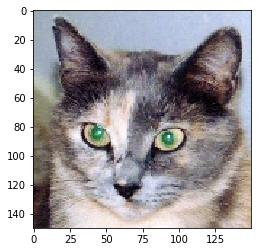

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [41]:
from keras import models
layer_outpts=[]
for i in range(1,2):
    layer_outpts.append(model.layers[0].get_output_at(i))
acitvation_model=models.Model(inputs=model.input,outputs=layer_outpts)

In [46]:
activationimg=acitvation_model.predict(img_tensor)

In [47]:
first=activationimg[0]

In [48]:
print(first.shape)

(4, 4, 512)
